# Library

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt
# from pylab import rcParams
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(rc={'figure.figsize':(16, 10), 'axes.grid':True}, style='ticks', palette='muted', font_scale=2.0)
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, RidgeClassifier, Lasso
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, precision_recall_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from scipy.stats import ttest_ind, chi2_contingency, pearsonr
import shap
shap.initjs()

# Data

In [2]:
df_v2_game=pd.read_csv('Data/tidy_datasets_v2/appt_df_game_v2_st_20210419.csv')
df_v2_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205002 entries, 0 to 205001
Data columns (total 49 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   filename                               205002 non-null  object 
 1   player_guid                            205002 non-null  object 
 2   session_guid                           205002 non-null  object 
 3   experiment_tag                         205002 non-null  object 
 4   task                                   205002 non-null  object 
 5   task_start_time                        205002 non-null  object 
 6   task_end_time                          205002 non-null  object 
 7   task_level                             205002 non-null  int64  
 8   task_outcome                           205002 non-null  object 
 9   study_name                             205002 non-null  object 
 10  task_session_secs                      205002 non-null  

In [3]:
df_v2_all=pd.read_csv('Data/tidy_datasets_v2/appt_df_v2_adherence_0.csv')
df_v2_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 69 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   experiment_tag                                               118 non-null    object 
 1   first_start_time                                             118 non-null    object 
 2   last_start_time                                              118 non-null    object 
 3   last_end_time                                                118 non-null    object 
 4   cal_studyday                                                 118 non-null    int64  
 5   cal_studyday_last_end_time                                   118 non-null    int64  
 6   studyday                                                     118 non-null    int64  
 7   act_studyday                                                 118 non-null    int

In [4]:
df_v2_all.shape

(118, 69)

In [5]:
age_gender_stats = df_v2_all.groupby('bg_gender')['bg_age'].agg(['mean', 'std', 'count', 'min', 'max']).reset_index()

print("Summary Statistics of Age by Gender:")
print(age_gender_stats)


Summary Statistics of Age by Gender:
   bg_gender       mean       std  count  min  max
0          0  71.000000  4.242641      2   68   74
1          1  71.525641  5.126261     78   64   84
2          2  75.026316  5.758598     38   65   87


In [6]:
df_v2_all.columns

Index(['experiment_tag', 'first_start_time', 'last_start_time',
       'last_end_time', 'cal_studyday', 'cal_studyday_last_end_time',
       'studyday', 'act_studyday', 'str_studyday', 'act_str_studyday',
       'unstr_studyday', 'act_unstr_studyday', 'w1_min', 'w2_min', 'w3_min',
       'w4_min', 'w5_min', 'w6_min', 'w7_min', 'w8_min', 'w9_min', 'w10_min',
       'w11_min', 'w12_min', 'min_adherence', 'w1_full', 'w2_full', 'w3_full',
       'w4_full', 'w5_full', 'w6_full', 'w7_full', 'w8_full', 'w9_full',
       'w10_full', 'w11_full', 'w12_full', 'ful_adherence', 'pct_adherence',
       'condition', 'bg_gender', 'bg_age', 'z_ufov3', 'z_digitsymb',
       'z_ravens', 'z_lettersets', 'z_hopkins_immediate', 'z_hopkins_delayed',
       'z_rey_immediate', 'z_rey_delayed', 'z_iadl', 'z_indp', 'z_nict',
       'z_mseq', 'z_pdq', 'z_gse', 'z_tse', 'z_cpq', 'z_mdpq',
       'z_techreadiness', 'composite_tech_proficiency',
       'composite_selfefficacy', 'composite_iadl', 'composite_reasoning

#### Gender: 0=NA; 1=Female; 2=Male

In [10]:
age_gender_stats = df_v2_all.groupby('bg_gender')[['composite_tech_proficiency','composite_selfefficacy',
                                                   'composite_iadl', 'composite_reasoning',
                                                   'composite_subj_cognition', 
                                                   'composite_obj_cognition_processingspeed',
                                                   'composite_obj_cognition_memory_immediaterecall',
                                                   'composite_obj_cognition_memory_delayedrecall',
                                                   'composite_obj_cognition_memory_immediate_and_delayed_recall']].agg(['mean', 'std']).reset_index()

print("Summary Statistics of Age by Gender:")
print(age_gender_stats)

Summary Statistics of Age by Gender:
  bg_gender composite_tech_proficiency           composite_selfefficacy  \
                                  mean       std                   mean   
0         0                   0.260435  0.076914               0.980799   
1         1                  -0.025940  0.770979              -0.064539   
2         2                   0.039539  0.801076               0.080853   

            composite_iadl           composite_reasoning            \
        std           mean       std                mean       std   
0  0.174320      -0.001523  0.079023            0.002508  0.842165   
1  0.837321       0.101525  0.740079           -0.028838  0.935309   
2  0.705358      -0.013161  0.666973            0.017708  0.716635   

  composite_subj_cognition           composite_obj_cognition_processingspeed  \
                      mean       std                                    mean   
0                 0.608021  0.655612                               -0.007844

In [12]:
composite_scores=df_v2_all[['composite_tech_proficiency',
       'composite_selfefficacy', 'composite_iadl', 'composite_reasoning',
       'composite_subj_cognition', 'composite_obj_cognition_processingspeed',
       'composite_obj_cognition_memory_immediaterecall',
       'composite_obj_cognition_memory_delayedrecall',
       'composite_obj_cognition_memory_immediate_and_delayed_recall']]
def calculate_sta(scores):
    mean=np.mean(scores)
    std=np.std(scores)
    score_range=np.ptp(scores)
    return mean,std,score_range
results={'Composite':[],
        'Mean':[],
        'Standard Deviation':[],
        'Range':[]}

for composite, scores in composite_scores.iteritems():
    mean, std, score_range = calculate_sta(scores)
    results['Composite'].append(composite)
    results['Mean'].append(mean)
    results['Standard Deviation'].append(std)
    results['Range'].append(score_range)
    
results_df = pd.DataFrame(results)

print(results_df)

                                           Composite          Mean  \
0                         composite_tech_proficiency  2.618644e-09   
1                             composite_selfefficacy -3.059322e-09   
2                                     composite_iadl  6.284536e-02   
3                                composite_reasoning -1.331756e-02   
4                           composite_subj_cognition -1.049538e-02   
5            composite_obj_cognition_processingspeed -1.204965e-02   
6     composite_obj_cognition_memory_immediaterecall  6.814031e-02   
7       composite_obj_cognition_memory_delayedrecall  7.249869e-03   
8  composite_obj_cognition_memory_immediate_and_d...  3.769509e-02   

   Standard Deviation     Range  
0            0.768923  3.654938  
1            0.796823  4.207919  
2            0.707014  3.821627  
3            0.859280  4.211619  
4            0.641120  4.132160  
5            0.815113  5.175294  
6            0.812323  3.630672  
7            0.908209  3.94

In [4]:
game_org=df_v2_game.sort_values(['experiment_tag','dt_datetime'])
beg_date=game_org.groupby('experiment_tag')['dt_datetime'].min().reset_index()
beg_date.rename(columns={'dt_datetime':'begin_date'},inplace=True)
df_v2_game=pd.merge(df_v2_game,beg_date,on='experiment_tag')
df_v2_game['dt_datetime'] = pd.to_datetime(df_v2_game['dt_datetime'])
df_v2_game['begin_date'] = pd.to_datetime(df_v2_game['begin_date'])
df_v2_game['days_played']=(df_v2_game['dt_datetime']-df_v2_game['begin_date']).dt.days
df_v2_game['days_played']=df_v2_game['days_played']+1
df_v2_game['days_played'].describe()
# The days they played scince they started

count    205002.000000
mean         47.866338
std          37.100814
min           1.000000
25%          17.000000
50%          41.000000
75%          71.000000
max         192.000000
Name: days_played, dtype: float64

In [5]:
# Define a custom function to perform the division, round, and add 1 if needed
def divide_and_round(value, divisor):
    result = value / divisor
    rounded_result = int(result)
    if result - rounded_result > 0:
        rounded_result += 1
    return rounded_result

# Apply the custom function to create the new column
divisor = 7  # Replace with your integer divisor
df_v2_game['num_weeks'] = df_v2_game['days_played'].apply(lambda x: divide_and_round(x, divisor))

# Print the DataFrame
print(df_v2_game['num_weeks'].describe())

count    205002.000000
mean          7.275675
std           5.295254
min           1.000000
25%           3.000000
50%           6.000000
75%          11.000000
max          28.000000
Name: num_weeks, dtype: float64


In [6]:
play_time=df_v2_game.groupby(['experiment_tag','num_weeks','days_played'],as_index=False).task_session_secs.sum()
play_time['adhr_cls'] = play_time.task_session_secs.apply(lambda x:0 if x < 10*60 else (1 if (x >= 10*60 and x < 36*60) else 2))
df_d_adhr = pd.crosstab(play_time.experiment_tag, play_time.days_played, values=play_time.adhr_cls, aggfunc='mean')
df_d_adhr = df_d_adhr[df_d_adhr.columns[14:84]].fillna(0)
print(df_d_adhr.shape)
df_d_adhr.head()

(118, 70)


days_played,15,16,17,18,19,20,21,22,23,24,...,75,76,77,78,79,80,81,82,83,84
experiment_tag,,,,,,,,,,,,,,,,,,,,,
11AAA,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11ART,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12ADD,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0
12BBB,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13AHS,2.0,0.0,2.0,2.0,2.0,0.0,1.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
play_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   experiment_tag     5190 non-null   object 
 1   num_weeks          5190 non-null   int64  
 2   days_played        5190 non-null   int64  
 3   task_session_secs  5190 non-null   float64
 4   adhr_cls           5190 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 202.9+ KB


In [8]:
play_time['num_weeks'].describe()

count    5190.000000
mean        7.598651
std         5.162852
min         1.000000
25%         3.000000
50%         7.000000
75%        11.000000
max        28.000000
Name: num_weeks, dtype: float64

In [9]:
# weekly adherence in min adherence {0:<5days>=10min, 1:>=5days>=10min}
df_min = play_time[(play_time.adhr_cls >= 1)].groupby(['experiment_tag', 'num_weeks'], as_index=False).adhr_cls.count()
df_w_adhr_min = pd.crosstab(df_min.experiment_tag, df_min.num_weeks, values=df_min.adhr_cls, aggfunc='mean')
df_w_adhr_min = df_w_adhr_min[df_w_adhr_min.columns[2:12]].fillna(0)/5
print(df_w_adhr_min.shape)
df_w_adhr_min.head()

(118, 10)


num_weeks,3,4,5,6,7,8,9,10,11,12
experiment_tag,,,,,,,,,,
11AAA,1.2,1.0,0.6,0.6,0.8,0.8,0.6,0.0,0.4,0.2
11ART,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12ADD,0.8,0.6,0.6,0.6,0.2,1.2,0.8,0.4,0.0,0.8
12BBB,0.4,0.4,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.0
13AHS,1.0,1.0,1.0,1.2,1.2,0.8,0.2,0.0,0.0,0.0


In [10]:
# weekly adherence in ful adherence {0:<5days>=36min, 1:>=5days>=36min}
df_ful= play_time[(play_time.adhr_cls == 2)].groupby(['experiment_tag', 'num_weeks'], as_index=False).adhr_cls.count()
df_w_adhr_ful = pd.crosstab(df_ful.experiment_tag, df_ful.num_weeks, values=df_ful.adhr_cls, aggfunc='mean')
df_w_adhr_ful = df_w_adhr_ful[df_w_adhr_ful.columns[2:12]].fillna(0)/5
print(df_w_adhr_ful.shape)
df_w_adhr_ful.head()

(113, 10)


num_weeks,3,4,5,6,7,8,9,10,11,12
experiment_tag,,,,,,,,,,
11AAA,0.2,0.0,0.4,0.4,0.0,0.2,0.2,0.0,0.0,0.0
11ART,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12ADD,0.0,0.0,0.2,0.0,0.0,0.2,0.4,0.0,0.0,0.2
12BBB,0.2,0.4,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
13AHS,0.8,1.0,1.0,1.2,1.2,0.8,0.2,0.0,0.0,0.0


In [11]:
# Average of adherence from week 3 to week 12
adhr_10w=pd.DataFrame()
df_w_adhr_min['mean_min_adhr']=df_w_adhr_min.mean(axis=1)
df_w_adhr_ful['mean_ful_adhr']=df_w_adhr_ful.mean(axis=1)
adhr_10w['min_adhr']=df_w_adhr_min['mean_min_adhr']
adhr_10w['ful_adhr']=df_w_adhr_ful['mean_ful_adhr']
adhr_10w.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 11AAA to 70HHH
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   min_adhr  118 non-null    float64
 1   ful_adhr  113 non-null    float64
dtypes: float64(2)
memory usage: 2.8+ KB


In [12]:
adhr_10w['min_adhr_cls']=(adhr_10w['min_adhr']>adhr_10w['min_adhr'].median()).astype(int)
adhr_10w['ful_adhr_cls']=(adhr_10w['ful_adhr']>adhr_10w['ful_adhr'].median()).astype(int)
adhr_10w.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 11AAA to 70HHH
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   min_adhr      118 non-null    float64
 1   ful_adhr      113 non-null    float64
 2   min_adhr_cls  118 non-null    int64  
 3   ful_adhr_cls  118 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 4.6+ KB


In [13]:
adhr_10w=adhr_10w.fillna(0)
adhr_10w.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 11AAA to 70HHH
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   min_adhr      118 non-null    float64
 1   ful_adhr      118 non-null    float64
 2   min_adhr_cls  118 non-null    int64  
 3   ful_adhr_cls  118 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 4.6+ KB


In [14]:
print(df_v2_all.shape)

(118, 69)


In [15]:
df_v2_all=pd.merge(df_v2_all,adhr_10w,on='experiment_tag')
df_v2_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 73 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   experiment_tag                                               118 non-null    object 
 1   first_start_time                                             118 non-null    object 
 2   last_start_time                                              118 non-null    object 
 3   last_end_time                                                118 non-null    object 
 4   cal_studyday                                                 118 non-null    int64  
 5   cal_studyday_last_end_time                                   118 non-null    int64  
 6   studyday                                                     118 non-null    int64  
 7   act_studyday                                                 118 non-null    int

In [16]:
df_v2=df_v2_all[['experiment_tag','condition','bg_gender','bg_age','z_ufov3','z_digitsymb','z_ravens',
                 'z_lettersets','z_hopkins_immediate','z_hopkins_delayed','z_rey_immediate','z_rey_delayed',
                 'z_iadl','z_indp','z_nict','z_mseq','z_pdq','z_gse','z_tse','z_cpq','z_mdpq','z_techreadiness',
                 'composite_tech_proficiency','composite_selfefficacy','composite_iadl','composite_reasoning',
                 'composite_subj_cognition','composite_obj_cognition_processingspeed','composite_obj_cognition_memory_immediaterecall',
                 'composite_obj_cognition_memory_delayedrecall',
                 'composite_obj_cognition_memory_immediate_and_delayed_recall','min_adhr','ful_adhr',
                 'min_adhr_cls','ful_adhr_cls']]
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 35 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   experiment_tag                                               118 non-null    object 
 1   condition                                                    118 non-null    int64  
 2   bg_gender                                                    118 non-null    int64  
 3   bg_age                                                       118 non-null    int64  
 4   z_ufov3                                                      118 non-null    float64
 5   z_digitsymb                                                  118 non-null    float64
 6   z_ravens                                                     118 non-null    float64
 7   z_lettersets                                                 118 non-null    flo

### Replace The Name of tasks

- WorkingMemory-Updating = Supply Run (SR)
- VisualSpatial = Riding Shotgun (RS)
- TowerOfLondon = Ante-Up (AU)
- Switching = Pen 'Em Up (PEU)
- FigureWeights = Trader Jack's (TJ)
- PipeMania = Irrigator (I)
- Dual N Back = Sentry Duty (SD)

In [17]:
new_name={
 "WorkingMemory-Updating" : "Supply Run",
    "VisualSpatial" : "Riding Shotgun",
    "TowerOfLondon" : "Ante-Up",
    "Switching" : "Pen Em Up",
    "FigureWeights" : "Trader Jack",
    "PipeMania" : "Irrigator",
    "Dual N Back" : "Sentry Duty"   
}
df_v2_game['task']=df_v2_game['task'].replace(new_name)
df_v2_game.head()

,filename,player_guid,session_guid,experiment_tag,task,task_start_time,task_end_time,task_level,task_outcome,study_name,...,days_since_first_session,studyday_n,studyday,studyweek_l,studyweek_c,new_session_secs,studyweek_num,begin_date,days_played,num_weeks
0,session WorkingMemory-Updating cc41237c-851c-4...,cc4829a2-7589-4df1-9e1c-b7757eb931ca,cc41237c-851c-4eed-ba35-221729184a73,61YYY,Supply Run,2018-05-29T23:21:43Z,2018-05-29T23:22:56Z,5,Defeat,MIND_FRONTIERS_V2,...,62,62,62,"(60,66]",11.0,72.633917,9,2018-03-28 13:18:58+00:00,63,9
1,session WorkingMemory-Updating 90436df0-38eb-4...,cc4829a2-7589-4df1-9e1c-b7757eb931ca,90436df0-38eb-4864-89b2-7d1ec27358ff,61YYY,Supply Run,2018-04-10T19:03:59Z,2018-04-10T19:05:24Z,6,Defeat,MIND_FRONTIERS_V2,...,13,13,13,"(12,18]",3.0,85.793100,2,2018-03-28 13:18:58+00:00,14,2
2,session Switching e37d1a1f-7fd8-45ff-8676-2eda...,cc4829a2-7589-4df1-9e1c-b7757eb931ca,e37d1a1f-7fd8-45ff-8676-2eda13bc70ad,61YYY,Pen Em Up,2018-06-17T02:12:53Z,2018-06-17T02:13:17Z,2,Stalemate,MIND_FRONTIERS_V2,...,81,81,81,"(78,84]",14.0,24.512831,12,2018-03-28 13:18:58+00:00,81,12
3,session VisualSpatial c46435af-77dd-48b5-b165-...,cc4829a2-7589-4df1-9e1c-b7757eb931ca,c46435af-77dd-48b5-b165-b9d81fb91283,61YYY,Riding Shotgun,2018-06-24T00:37:01Z,2018-06-24T00:37:13Z,4,Victory,MIND_FRONTIERS_V2,...,88,88,88,"(84,90]",15.0,12.573609,13,2018-03-28 13:18:58+00:00,88,13
4,session WorkingMemory-Updating b721f5c6-ef81-4...,cc4829a2-7589-4df1-9e1c-b7757eb931ca,b721f5c6-ef81-4298-bb6d-2c98c5578e1a,61YYY,Supply Run,2018-05-22T23:30:27Z,2018-05-22T23:31:52Z,10,Stalemate,MIND_FRONTIERS_V2,...,55,55,55,"(54,60]",10.0,85.047497,8,2018-03-28 13:18:58+00:00,56,8


### The number of sessions for each game they played in 12 weeks

In [18]:
game_12week=df_v2_game[df_v2_game['num_weeks']<=12]
game_12week.shape

(171537, 52)

In [19]:
df1 = game_12week.groupby(['task','task_outcome','num_weeks']).size().reset_index(name='num_outcome_sessions')
print(df1.shape)
df1.head(10)

(383, 4)


,task,task_outcome,num_weeks,num_outcome_sessions
0,Ante-Up,Abort,1,263
1,Ante-Up,Abort,2,140
2,Ante-Up,Abort,3,139
3,Ante-Up,Abort,4,97
4,Ante-Up,Abort,5,149
5,Ante-Up,Abort,6,132
6,Ante-Up,Abort,7,143
7,Ante-Up,Abort,8,142
8,Ante-Up,Abort,9,168
9,Ante-Up,Abort,10,176


In [20]:
games=df1['task'].unique()
games

array(['Ante-Up', 'Irrigator', 'Pen Em Up', 'Riding Shotgun',
       'Sentry Duty', 'Supply Run', 'Trader Jack'], dtype=object)

In [21]:
outcomes=df1['task_outcome'].unique()

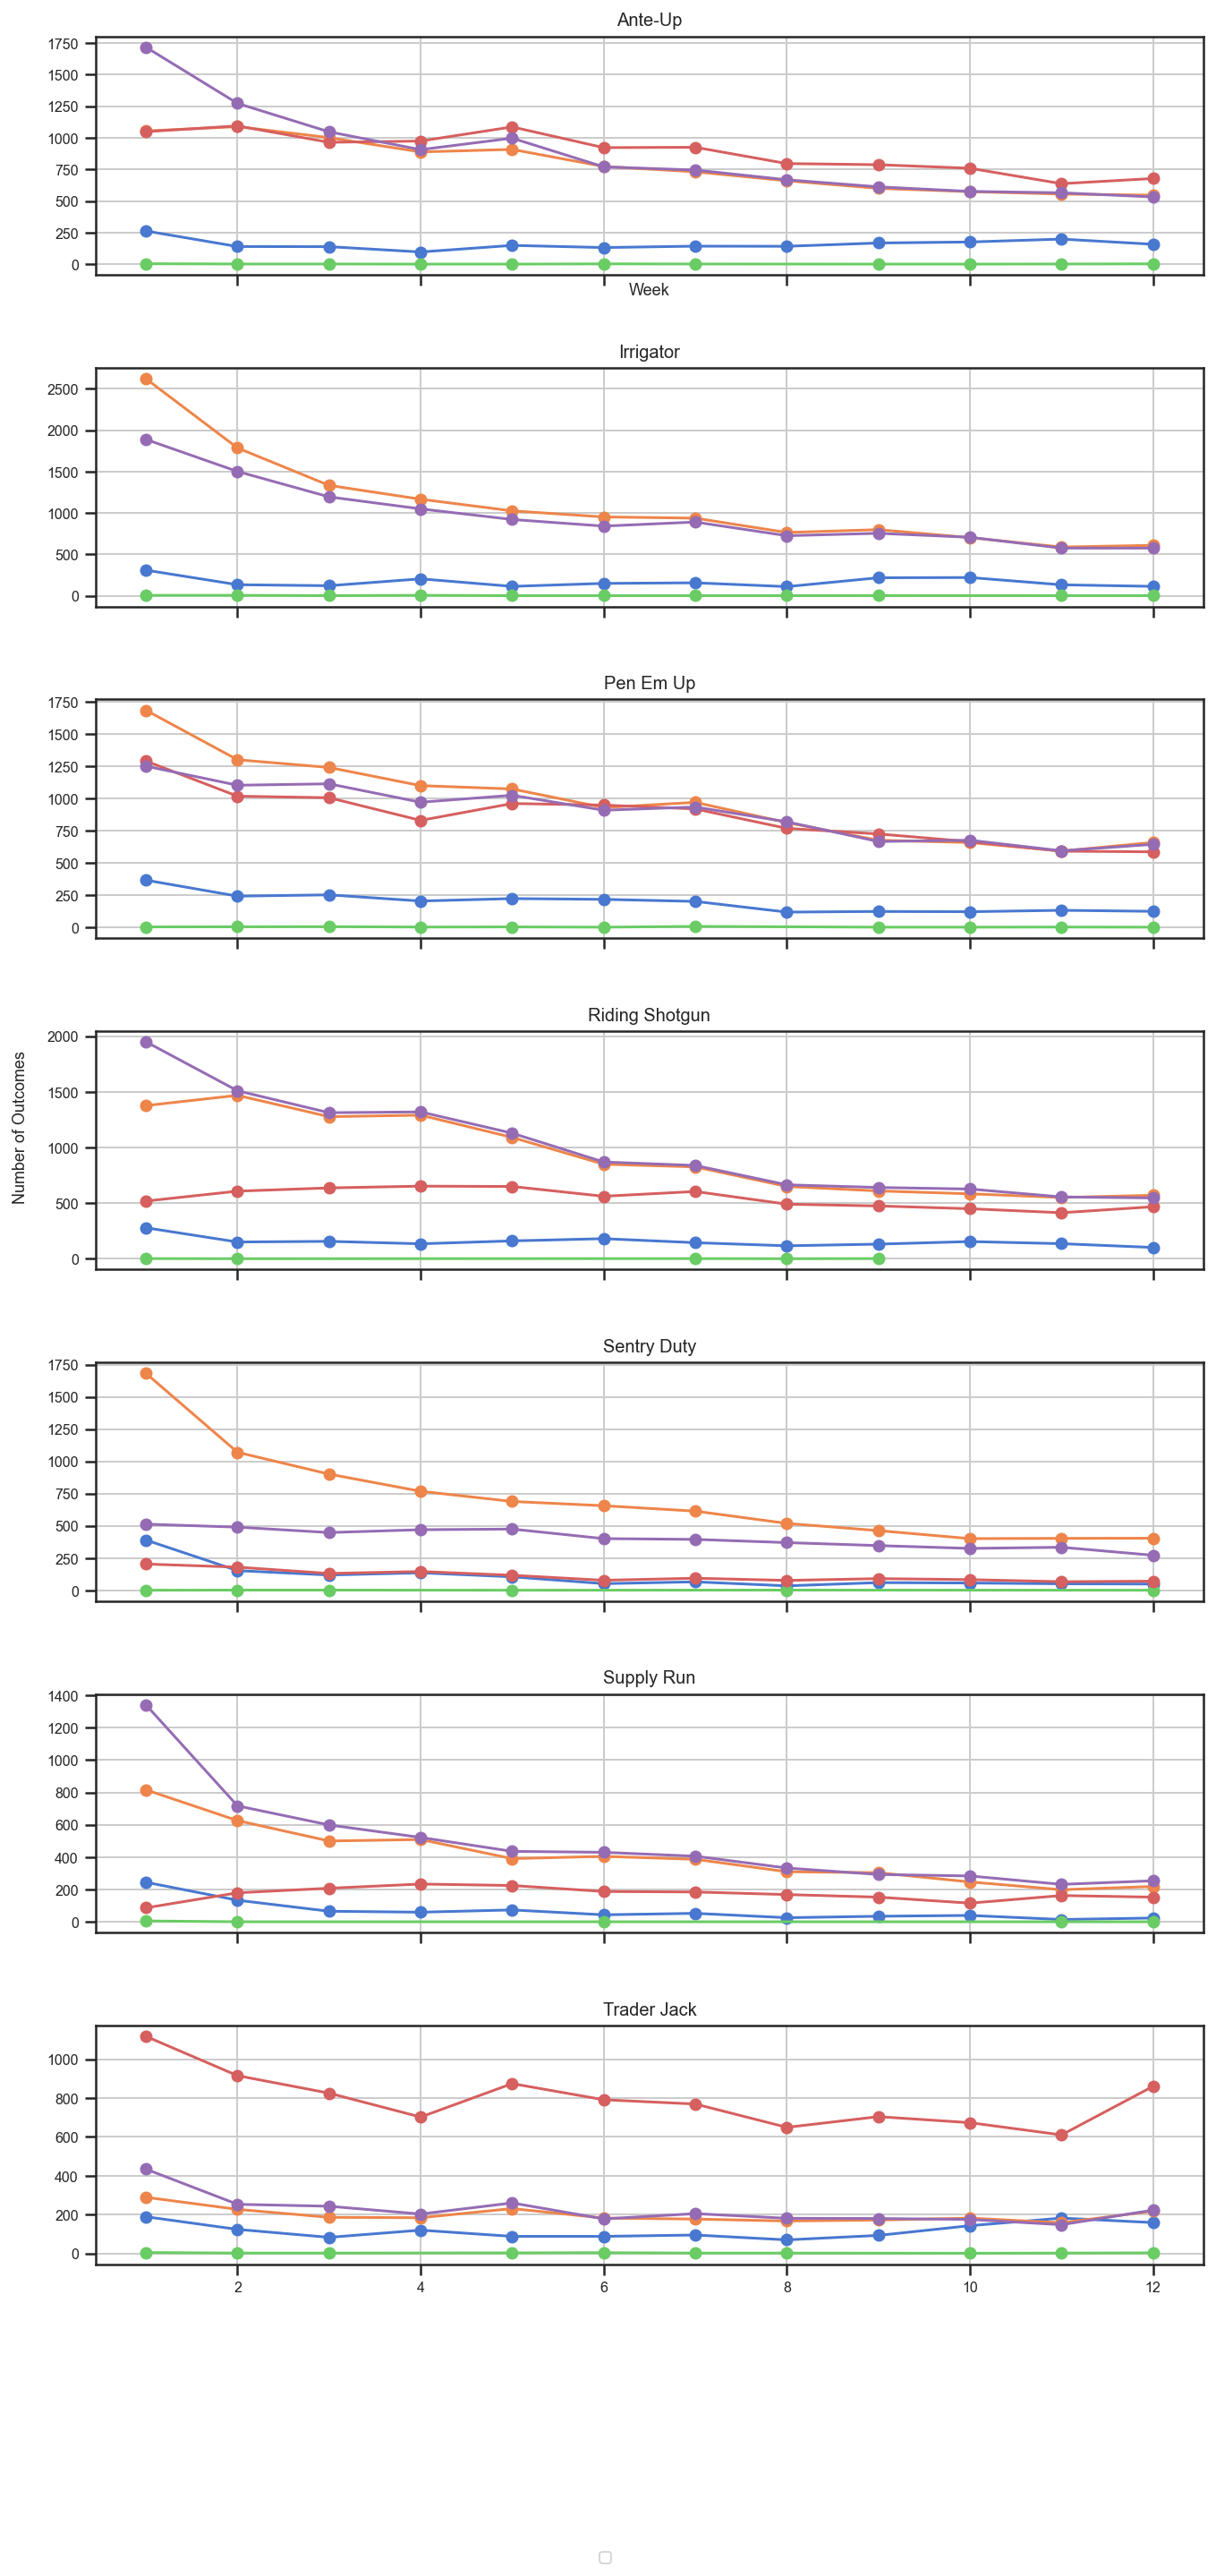

In [22]:
fig, axes = plt.subplots(len(games), 1, figsize=(10, 20), sharex=True)

for i, game in enumerate(games):
    ax = axes[i]
    game_data = df1[df1['task'] == game]
    for outcome in outcomes:
        outcome_data = game_data[game_data['task_outcome'] == outcome]
        ax.plot(outcome_data['num_weeks'], outcome_data['num_outcome_sessions'],
                label=outcome if i == 0 else "", linestyle='-', marker='o')
    
    
    ax.set_title(game, fontsize=10)  # Adjusted fontsize for title
    if i == 0:  # Only set xlabel for the last subplot to reduce clutter
        ax.set_xlabel('Week', fontsize=9)
    if i == len(games) - 1:  # Place one common legend at the bottom
        handles, labels = ax.get_legend_handles_labels()
    ax.tick_params(axis='both', which='major', labelsize=8)

# Set a common Y-axis label
fig.text(0.04, 0.5, 'Number of Outcomes', va='center', rotation='vertical', fontsize=9)  # Common Y-axis label

# Place the legend outside of the figure
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize=8)

plt.subplots_adjust(hspace=0.5)  # Adjust the space between plots
plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])  # Adjust the tight layout to accommodate the external legend
plt.savefig('/Users/pangyuanying/Desktop/APPT/2023/Extend_SEPDA_Paper/Plot/num_outcome_12w.png')
plt.show()

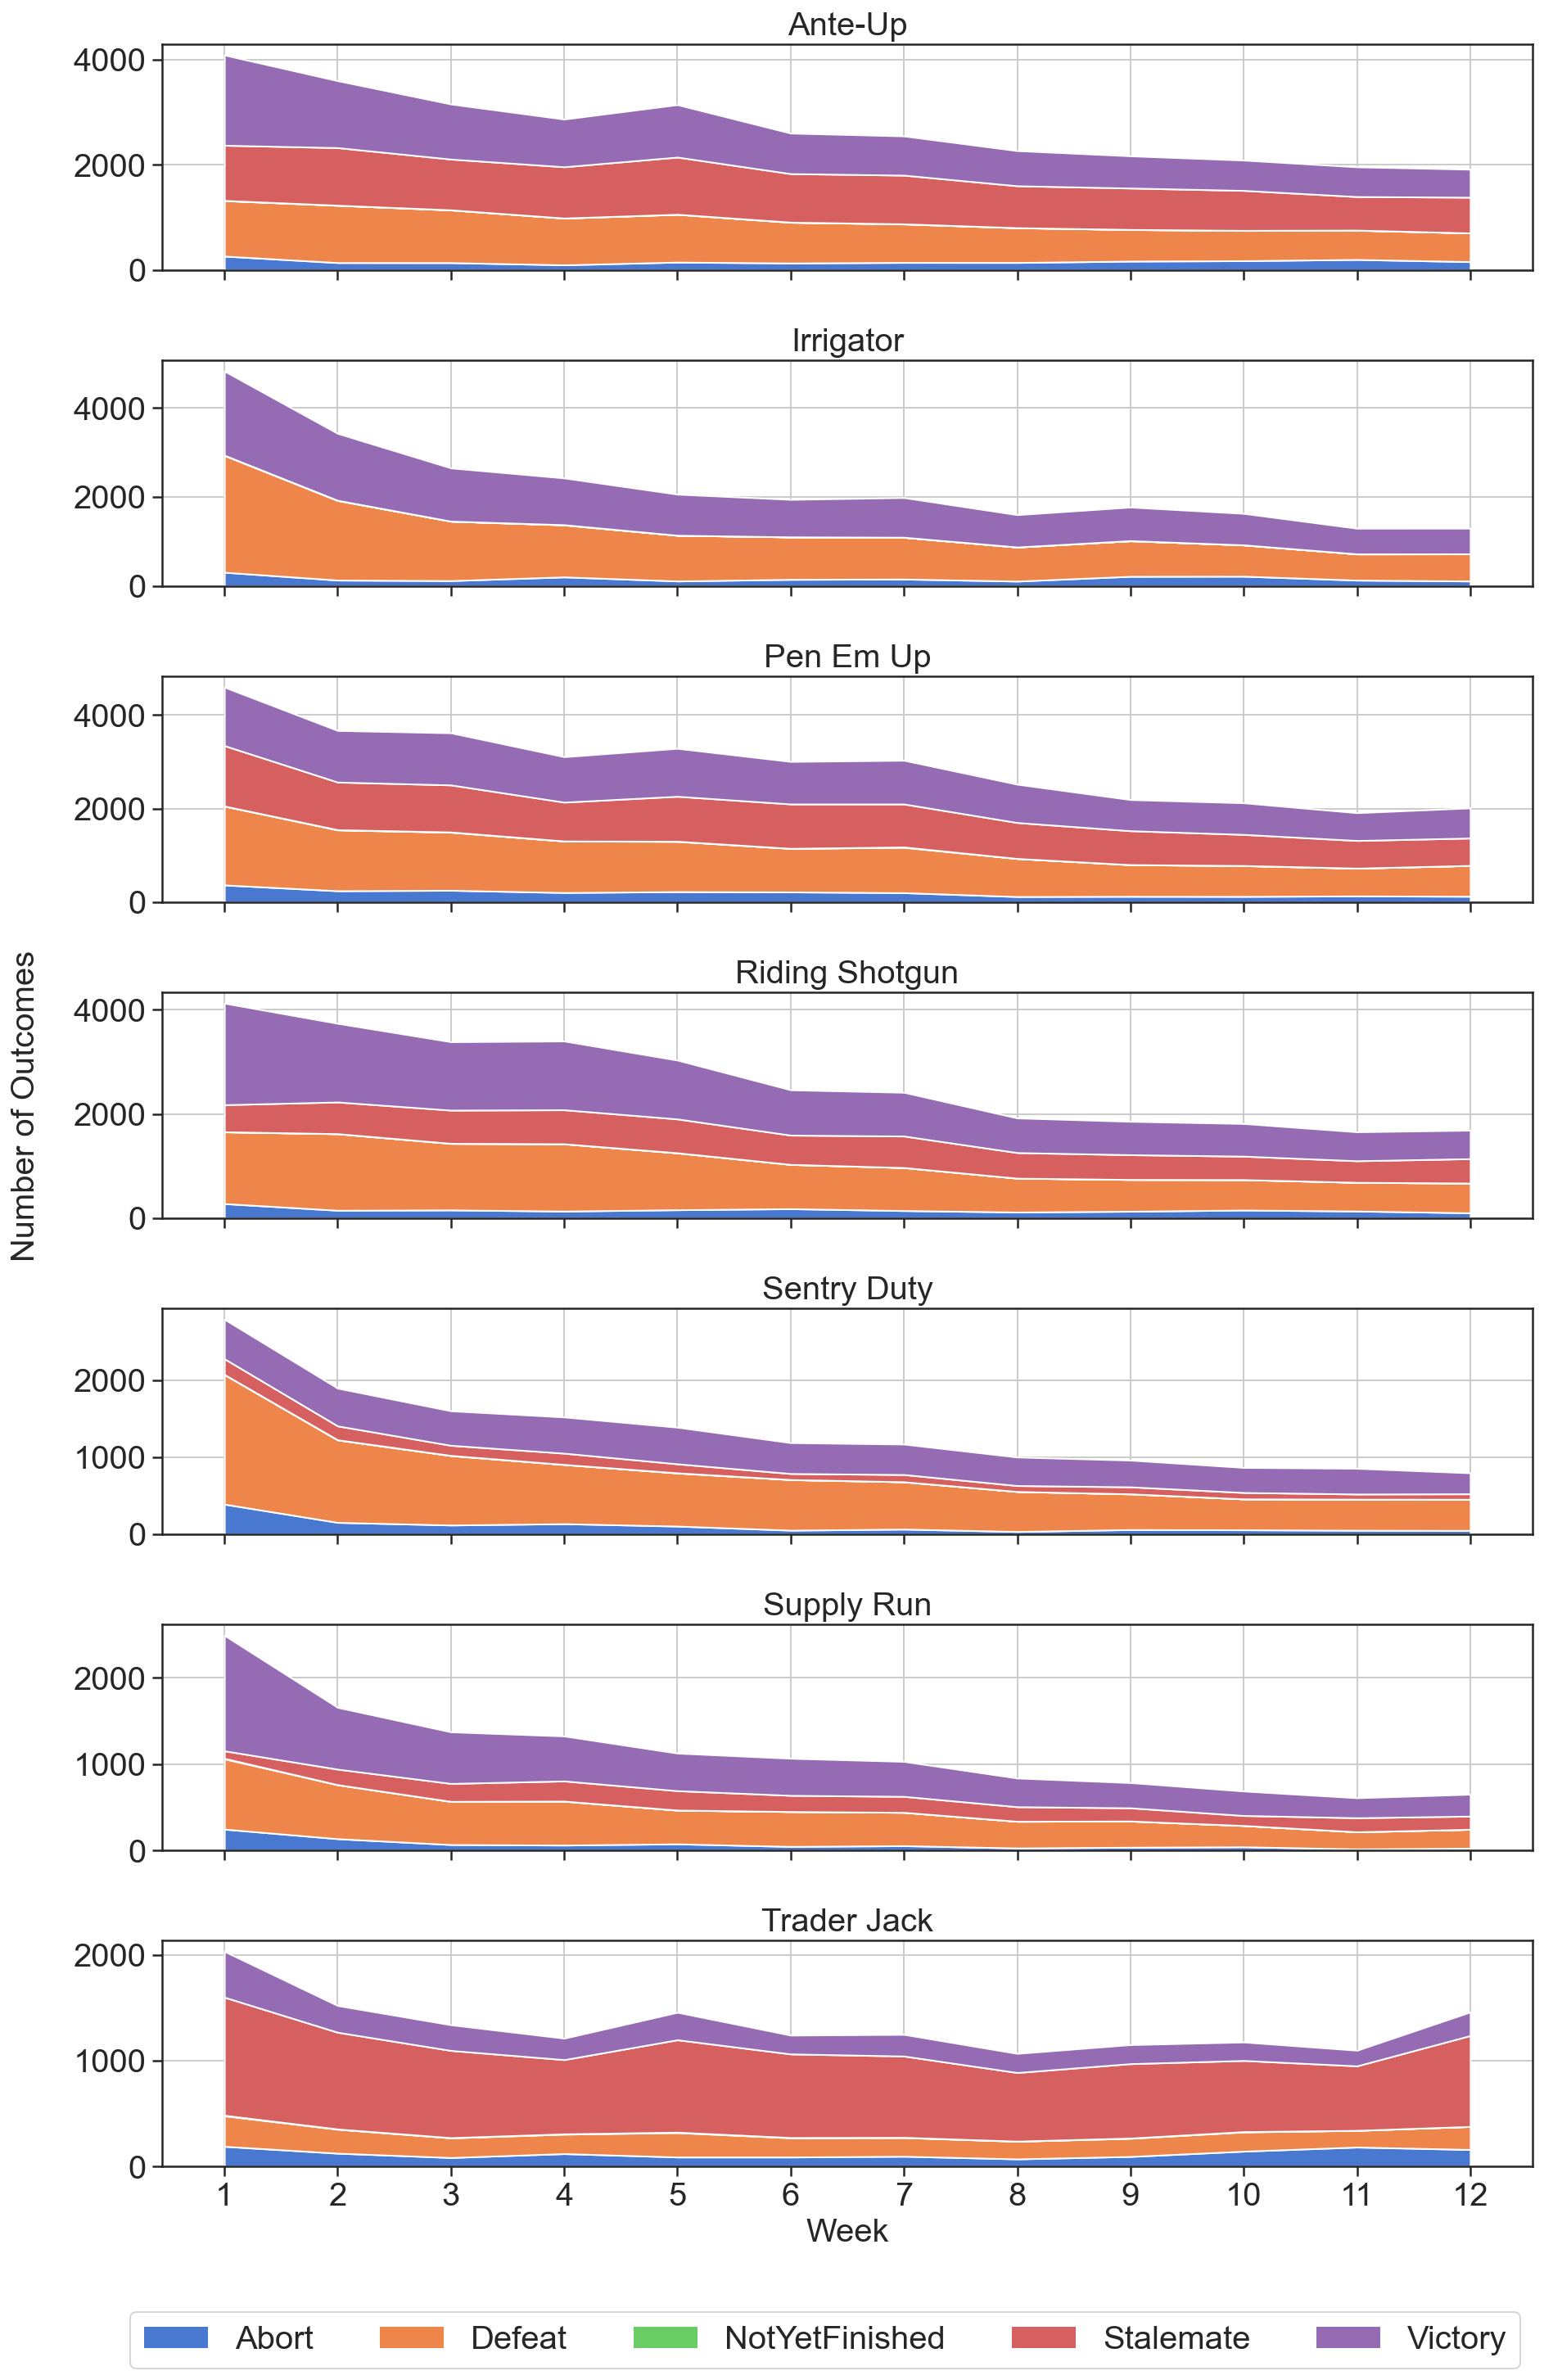

In [23]:
weeeks=np.arange(1,13)
fig, axes = plt.subplots(len(games), 1, figsize=(15, 20), sharex=True) 

for i, game in enumerate(games):
    ax = axes[i]
    game_data = df1[df1['task'] == game]
    weeks = game_data['num_weeks'].unique()
    
   
    outcome_data = []
    labels = []
    for outcome in outcomes:
        outcome_weekly_data = game_data[game_data['task_outcome'] == outcome].sort_values(by='num_weeks')['num_outcome_sessions'].values
        if len(outcome_weekly_data) < len(weeks):
            outcome_weekly_data = np.append(outcome_weekly_data, [0] * (len(weeks) - len(outcome_weekly_data)))
        outcome_data.append(outcome_weekly_data)
        labels.append(outcome)
    

    ax.set_title(game, fontsize=20)
    ax.set_xticks(weeks) 
    ax.set_xticklabels(weeks)
    
    ax.stackplot(weeks, outcome_data, labels=labels, baseline='zero')
    if i == len(games) - 1:
        ax.set_xlabel('Week', fontsize=20)
        
    ax.tick_params(axis='both', which='major', labelsize=20)

# Set common y-axis label for the figure
fig.text(0.04, 0.5, 'Number of Outcomes', va='center', rotation='vertical', fontsize=20)

# Place the legend at the top of the figure, outside the subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.005), ncol=len(outcomes), fontsize=20)

plt.subplots_adjust(top=0.95, bottom=0.05, hspace=0.4)
plt.savefig('/Users/pangyuanying/Desktop/APPT/2023/Extend_SEPDA_Paper/Plot/num_outcome_12w_areachart.png', bbox_inches='tight')
plt.show()

In [24]:
num_outcome=df1.groupby(['task','task_outcome'])['num_outcome_sessions'].agg(['sum','count']).reset_index()
num_outcome

,task,task_outcome,sum,count
0,Ante-Up,Abort,1906,12
1,Ante-Up,Defeat,9378,12
2,Ante-Up,NotYetFinished,22,11
3,Ante-Up,Stalemate,10670,12
4,Ante-Up,Victory,10406,12
5,Irrigator,Abort,1977,12
6,Irrigator,Defeat,13280,12
7,Irrigator,NotYetFinished,24,11
8,Irrigator,Victory,11619,12
9,Pen Em Up,Abort,2323,12


In [25]:
df2=game_12week.groupby(['task'])['experiment_tag'].nunique().reset_index(name='num_players')
print(df2.shape)
df2.head(10)
# Everyone has palyed each game

(7, 2)


,task,num_players
0,Ante-Up,118
1,Irrigator,118
2,Pen Em Up,118
3,Riding Shotgun,118
4,Sentry Duty,118
5,Supply Run,118
6,Trader Jack,118


In [26]:
num_outcome['avg_outcome']=(num_outcome['sum'])/118
num_outcome
# The average number of each outcomes for 118 participants

,task,task_outcome,sum,count,avg_outcome
0,Ante-Up,Abort,1906,12,16.152542
1,Ante-Up,Defeat,9378,12,79.474576
2,Ante-Up,NotYetFinished,22,11,0.186441
3,Ante-Up,Stalemate,10670,12,90.423729
4,Ante-Up,Victory,10406,12,88.186441
5,Irrigator,Abort,1977,12,16.754237
6,Irrigator,Defeat,13280,12,112.542373
7,Irrigator,NotYetFinished,24,11,0.203390
8,Irrigator,Victory,11619,12,98.466102
9,Pen Em Up,Abort,2323,12,19.686441


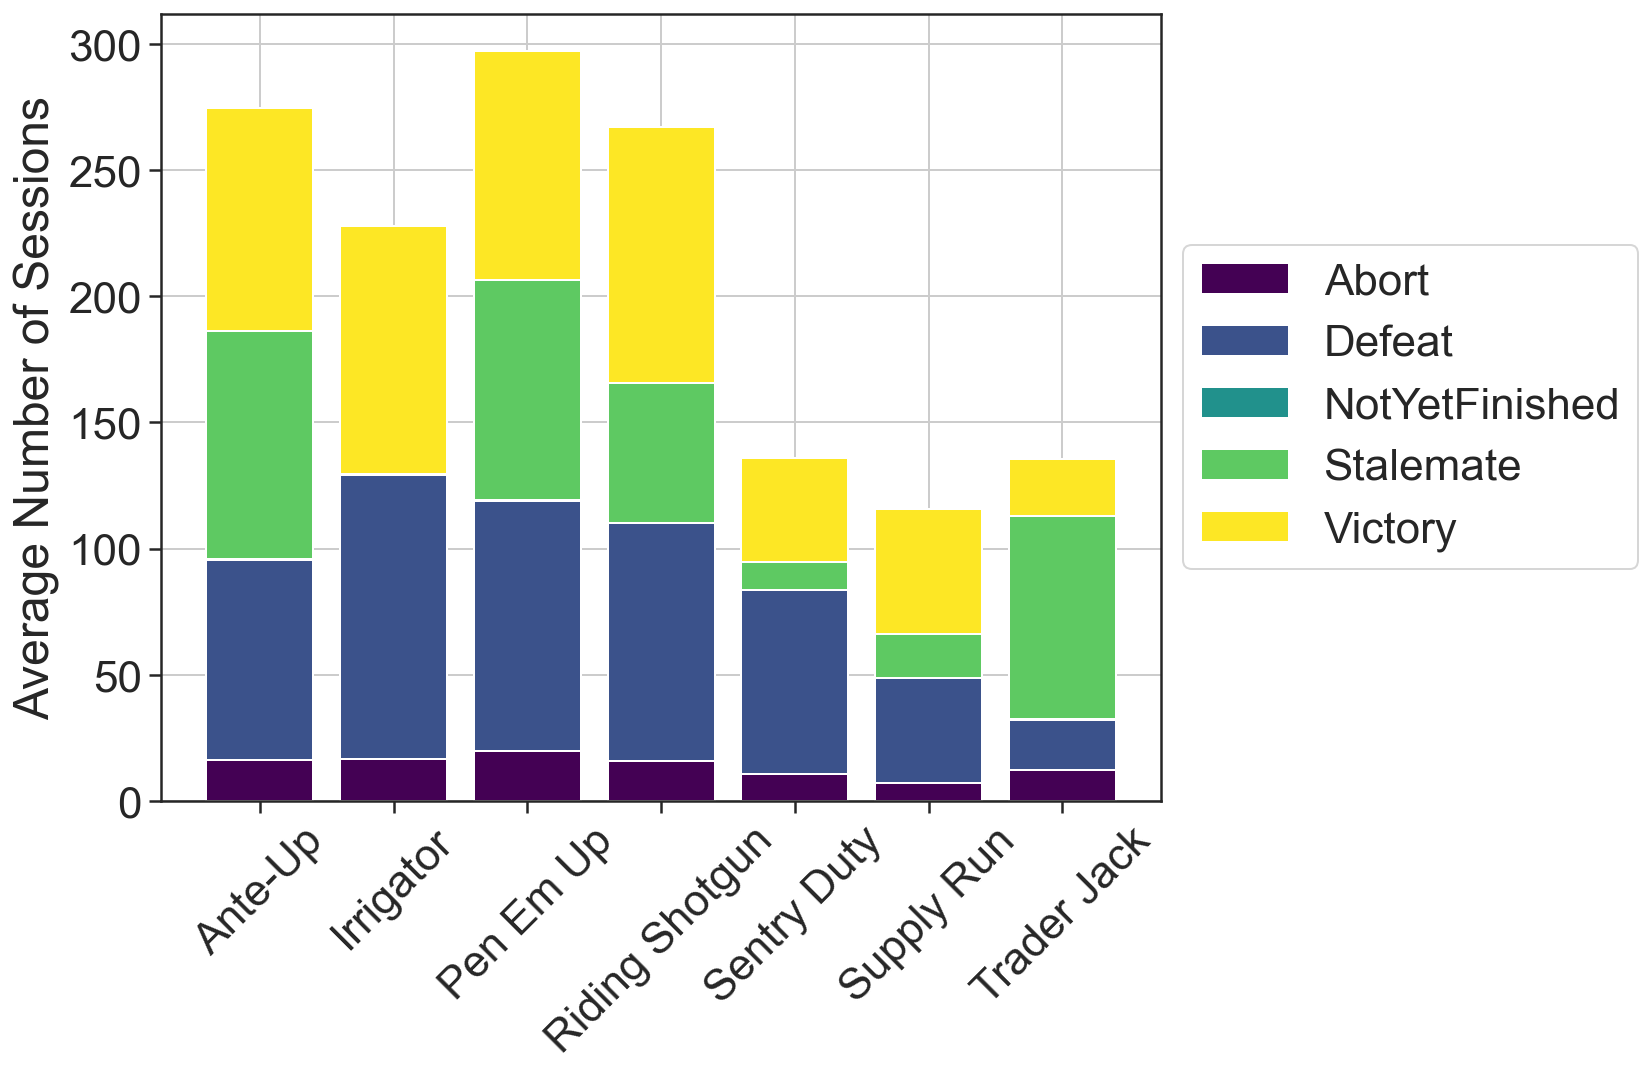

In [27]:
plt.figure(figsize=(12, 8))


games = num_outcome['task'].unique()
outcomes = num_outcome['task_outcome'].unique()

# Create a color map for outcomes for visual distinction, ensuring enough colors for all outcomes
colors = plt.cm.viridis(np.linspace(0, 1, len(outcomes)))

# Initialize the bottom position for the stacks
bottoms = np.zeros(len(games))


for i, outcome in enumerate(outcomes):
    outcome_sessions = []
    for game in games:
        # Get the average session for each game and outcome
        session = num_outcome[(num_outcome['task'] == game) & (num_outcome['task_outcome'] == outcome)]['avg_outcome'].sum()
        outcome_sessions.append(session)
    
    # Plotting the bars
    plt.bar(games, outcome_sessions, bottom=bottoms, label=outcome, color=colors[i])
    
    # Update the bottom positions for the next stack
    bottoms += outcome_sessions

# Adding labels and title
#plt.xlabel('Games')
plt.ylabel('Average Number of Sessions')
#plt.title('Stacked Average Number of Sessions for Different Outcomes in Each Game')
plt.legend()


plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()


plt.savefig('/Users/pangyuanying/Desktop/APPT/2023/Extend_SEPDA_Paper/Plot/Avg_outcome_12w.png')
# Display the plot
plt.show()

### The game performance data for previous two weeks

In [28]:
# The game performance data for previous two weeks
game_all_2week=df_v2_game[df_v2_game['num_weeks']<=2]
game_all_2week.shape

(44451, 52)

In [29]:
df2 = game_all_2week.groupby(['experiment_tag', 'task','task_outcome']).size().reset_index(name='num_sessions')
num_outcome=df2.groupby(['task','task_outcome'])['num_sessions'].agg(['sum','count']).reset_index()
num_outcome['avg_outcome']=(num_outcome['sum'])/118
num_outcome

,task,task_outcome,sum,count,avg_outcome
0,Ante-Up,Abort,403,86,3.415254
1,Ante-Up,Defeat,2142,102,18.152542
2,Ante-Up,NotYetFinished,6,4,0.050847
3,Ante-Up,Stalemate,2142,104,18.152542
4,Ante-Up,Victory,2988,118,25.322034
5,Irrigator,Abort,442,113,3.745763
6,Irrigator,Defeat,4406,118,37.338983
7,Irrigator,NotYetFinished,10,8,0.084746
8,Irrigator,Victory,3389,118,28.720339
9,Pen Em Up,Abort,608,97,5.152542


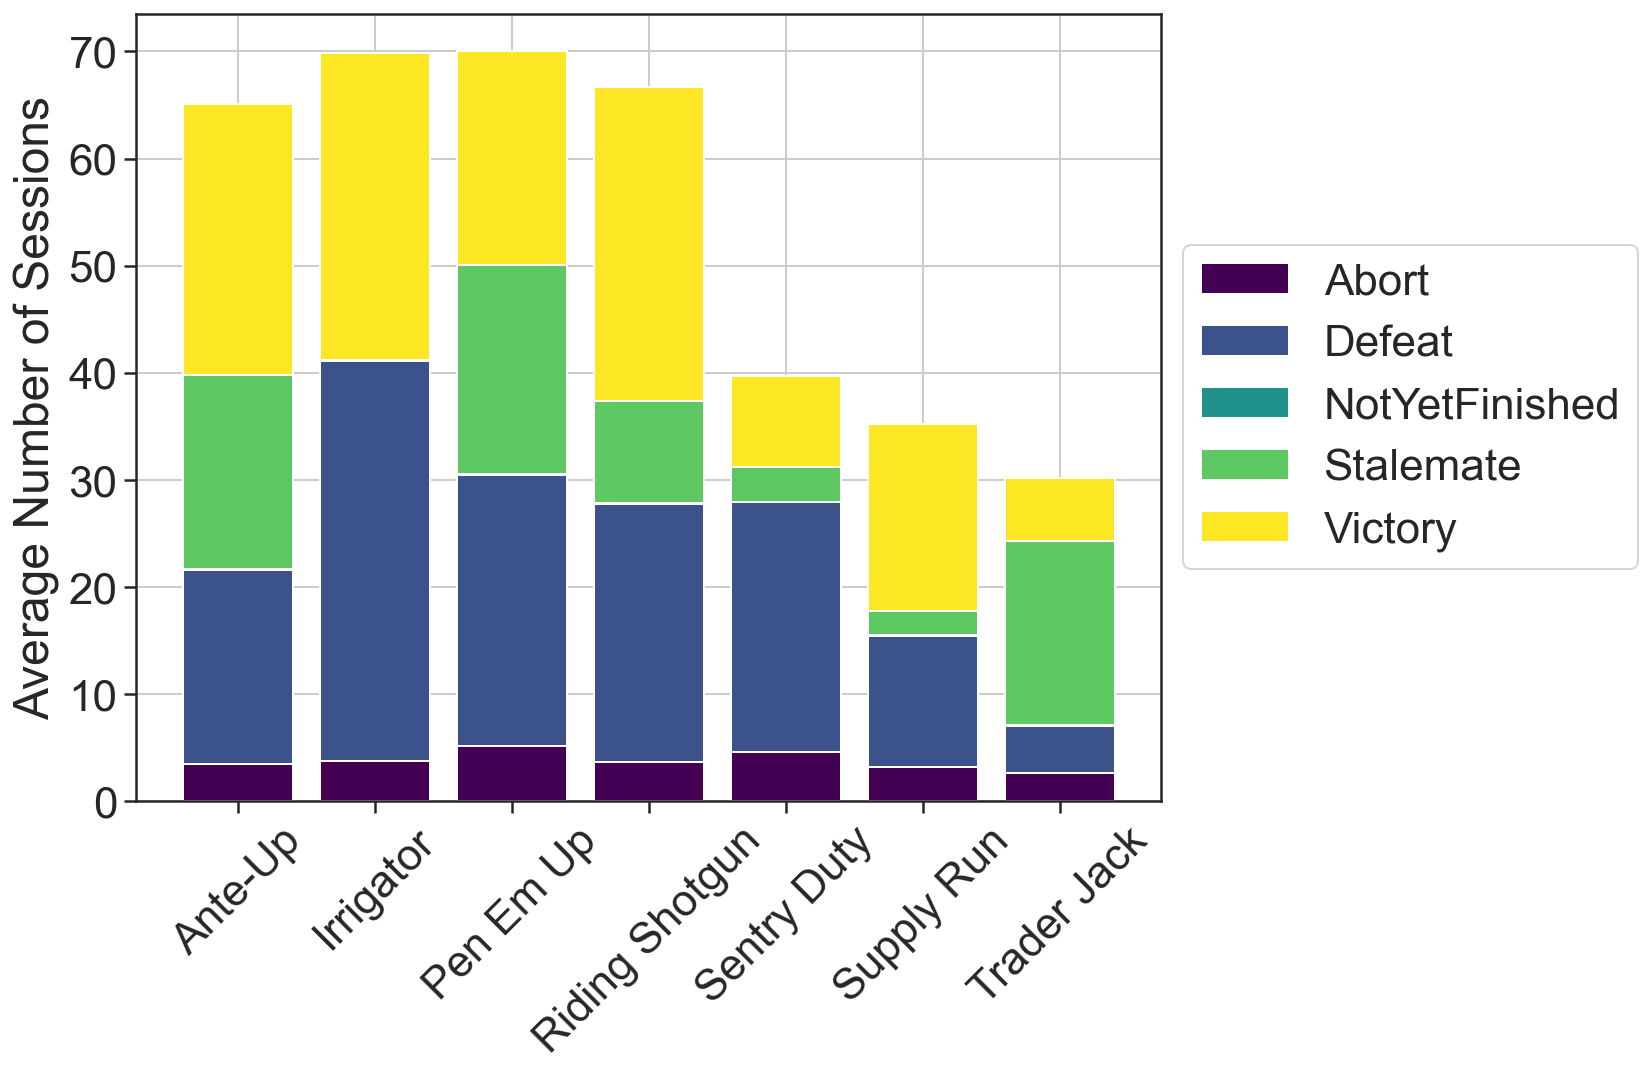

In [30]:
plt.figure(figsize=(12, 8))


games = num_outcome['task'].unique()
outcomes = num_outcome['task_outcome'].unique()

colors = plt.cm.viridis(np.linspace(0, 1, len(outcomes)))

bottoms = np.zeros(len(games))


for i, outcome in enumerate(outcomes):
    outcome_sessions = []
    for game in games:
        session = num_outcome[(num_outcome['task'] == game) & (num_outcome['task_outcome'] == outcome)]['avg_outcome'].sum()
        outcome_sessions.append(session)
    
    plt.bar(games, outcome_sessions, bottom=bottoms, label=outcome, color=colors[i])
    
    bottoms += outcome_sessions

plt.ylabel('Average Number of Sessions')
plt.legend()


plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()


plt.savefig('/Users/pangyuanying/Desktop/APPT/2023/Extend_SEPDA_Paper/Plot/Avg_outcome_2w.png')
# Display the plot
plt.show()

### The number of sessions for each game they played in previous two weeks

In [31]:
game_all_2week['task'].unique()

array(['Supply Run', 'Irrigator', 'Sentry Duty', 'Ante-Up',
       'Riding Shotgun', 'Pen Em Up', 'Trader Jack'], dtype=object)

In [32]:
num_sessions = game_all_2week.groupby(['experiment_tag', 'task']).size().reset_index(name='num_sessions')

SR_sessions=num_sessions[num_sessions['task']=='Supply Run']
RS_sessions=num_sessions[num_sessions['task']=='Riding Shotgun']
AU_sessions=num_sessions[num_sessions['task']=='Ante-Up']
PEU_sessions=num_sessions[num_sessions['task']=='Pen Em Up']
I_sessions=num_sessions[num_sessions['task']=='Irrigator']
TJ_sessions=num_sessions[num_sessions['task']=='Trader Jack']
SD_sessions=num_sessions[num_sessions['task']=='Sentry Duty']

SR_sessions.rename(columns={'num_sessions':'SR_num_sessions'}, inplace=True)
RS_sessions.rename(columns={'num_sessions':'RS_num_sessions'}, inplace=True)
AU_sessions.rename(columns={'num_sessions':'AU_num_sessions'}, inplace=True)
PEU_sessions.rename(columns={'num_sessions':'PEU_num_sessions'}, inplace=True)
TJ_sessions.rename(columns={'num_sessions':'TJ_num_sessions'}, inplace=True)
I_sessions.rename(columns={'num_sessions':'I_num_sessions'}, inplace=True)
SD_sessions.rename(columns={'num_sessions':'SD_num_sessions'}, inplace=True)

df_v2 = df_v2.merge(SR_sessions[['experiment_tag','SR_num_sessions']],on='experiment_tag', how='left')
df_v2 = df_v2.merge(RS_sessions[['experiment_tag','RS_num_sessions']],on='experiment_tag', how='left')
df_v2 = df_v2.merge(AU_sessions[['experiment_tag','AU_num_sessions']],on='experiment_tag', how='left')
df_v2 = df_v2.merge(PEU_sessions[['experiment_tag','PEU_num_sessions']],on='experiment_tag', how='left')
df_v2 = df_v2.merge(TJ_sessions[['experiment_tag','TJ_num_sessions']],on='experiment_tag', how='left')
df_v2 = df_v2.merge(I_sessions[['experiment_tag','I_num_sessions']],on='experiment_tag', how='left')
df_v2 = df_v2.merge(SD_sessions[['experiment_tag','SD_num_sessions']],on='experiment_tag', how='left')

df_v2[['SR_num_sessions',
       'RS_num_sessions', 'AU_num_sessions', 'PEU_num_sessions',
       'TJ_num_sessions', 'I_num_sessions', 'SD_num_sessions']]=df_v2[['SR_num_sessions',
       'RS_num_sessions', 'AU_num_sessions', 'PEU_num_sessions',
       'TJ_num_sessions', 'I_num_sessions', 'SD_num_sessions']].fillna(0)
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 42 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   experiment_tag                                               118 non-null    object 
 1   condition                                                    118 non-null    int64  
 2   bg_gender                                                    118 non-null    int64  
 3   bg_age                                                       118 non-null    int64  
 4   z_ufov3                                                      118 non-null    float64
 5   z_digitsymb                                                  118 non-null    float64
 6   z_ravens                                                     118 non-null    float64
 7   z_lettersets                                                 118 non-null    flo


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

### The higest level (task_level: 1-58) they reached for each game in previous two weeks

In [33]:
max_levels=game_all_2week.groupby(['experiment_tag', 'task'])['task_level'].idxmax().reset_index()

SR=max_levels.loc[max_levels['task']=='Supply Run']
RS=max_levels.loc[max_levels['task']=='Riding Shotgun']
AU=max_levels.loc[max_levels['task']=='Ante-Up']
PEU=max_levels.loc[max_levels['task']=='Pen Em Up']
I=max_levels.loc[max_levels['task']=='Irrigator']
TJ=max_levels.loc[max_levels['task']=='Trader Jack']
SD=max_levels.loc[max_levels['task']=='Sentry Duty']

SR.rename(columns={'task_level':'SR_max_level'}, inplace=True)
RS.rename(columns={'task_level':'RS_max_level'}, inplace=True)
AU.rename(columns={'task_level':'AU_max_level'}, inplace=True)
PEU.rename(columns={'task_level':'PEU_max_level'}, inplace=True)
I.rename(columns={'task_level':'I_max_level'}, inplace=True)
TJ.rename(columns={'task_level':'TJ_max_level'}, inplace=True)
SD.rename(columns={'task_level':'SD_max_level'}, inplace=True)

df_v2 = df_v2.merge(SR[['experiment_tag','SR_max_level']],on='experiment_tag', how='left')
df_v2 = df_v2.merge(RS[['experiment_tag','RS_max_level']],on='experiment_tag', how='left')
df_v2 = df_v2.merge(AU[['experiment_tag','AU_max_level']],on='experiment_tag', how='left')
df_v2 = df_v2.merge(PEU[['experiment_tag','PEU_max_level']],on='experiment_tag', how='left')
df_v2 = df_v2.merge(I[['experiment_tag','I_max_level']],on='experiment_tag', how='left')
df_v2 = df_v2.merge(TJ[['experiment_tag','TJ_max_level']],on='experiment_tag', how='left')
df_v2 = df_v2.merge(SD[['experiment_tag','SD_max_level']],on='experiment_tag', how='left')

print(df_v2.info())


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 49 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   experiment_tag                                               118 non-null    object 
 1   condition                                                    118 non-null    int64  
 2   bg_gender                                                    118 non-null    int64  
 3   bg_age                                                       118 non-null    int64  
 4   z_ufov3                                                      118 non-null    float64
 5   z_digitsymb                                                  118 non-null    float64
 6   z_ravens                                                     118 non-null    float64
 7   z_lettersets                                                 118 non-null    flo


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [34]:
df_v2[['SR_max_level', 'RS_max_level', 'AU_max_level', 'PEU_max_level',
       'TJ_max_level', 'I_max_level', 'SD_max_level']]=df_v2[['SR_max_level', 'RS_max_level', 'AU_max_level', 'PEU_max_level',
       'TJ_max_level', 'I_max_level', 'SD_max_level']].fillna(0)
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 49 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   experiment_tag                                               118 non-null    object 
 1   condition                                                    118 non-null    int64  
 2   bg_gender                                                    118 non-null    int64  
 3   bg_age                                                       118 non-null    int64  
 4   z_ufov3                                                      118 non-null    float64
 5   z_digitsymb                                                  118 non-null    float64
 6   z_ravens                                                     118 non-null    float64
 7   z_lettersets                                                 118 non-null    flo

### The proportion of each seven tasks played in terms of the number of sessions in previous two weeks

In [35]:
df_v2['total_num_sessions_2weeks']=df_v2['SR_num_sessions']+df_v2['RS_num_sessions']+df_v2['AU_num_sessions']+df_v2['PEU_num_sessions']+df_v2['TJ_num_sessions']+df_v2['I_num_sessions']+df_v2['SD_num_sessions']
df_v2['total_num_sessions_2weeks'].describe()

count     118.000000
mean      376.703390
std       234.173663
min        24.000000
25%       181.250000
50%       369.500000
75%       474.500000
max      1437.000000
Name: total_num_sessions_2weeks, dtype: float64

In [36]:
columns_to_calculate = ['SR', 'RS', 'AU', 'PEU','TJ','I','SD']  # List of column prefixes

for column in columns_to_calculate:
    df_v2[f'{column}_pct'] = df_v2[f'{column}_num_sessions'] / df_v2['total_num_sessions_2weeks']

In [37]:
df_v2[['SR_pct','RS_pct','AU_pct','PEU_pct','TJ_pct','I_pct','SD_pct']].describe()

,SR_pct,RS_pct,AU_pct,PEU_pct,TJ_pct,I_pct,SD_pct
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,0.097393,0.174918,0.159244,0.187648,0.072157,0.188376,0.120265
std,0.036733,0.079394,0.082494,0.075838,0.044230,0.110516,0.049600
min,0.006818,0.004545,0.005042,0.000000,0.003361,0.053364,0.017647
25%,0.078046,0.119002,0.100633,0.148365,0.044231,0.127282,0.088162
50%,0.094307,0.180656,0.148885,0.179696,0.062210,0.160852,0.116741
75%,0.116219,0.234208,0.206037,0.217165,0.085882,0.211193,0.147005
max,0.257576,0.342342,0.415214,0.537162,0.238351,0.838655,0.304348


### The proportion of each outcomes for each task over all the sessions on the same task in previous two weeks

In [38]:
# The total number of different outcomes for different tasks
task_outcome=game_all_2week.groupby(['experiment_tag','task','task_outcome']).agg({'task_outcome':['count']})
task_outcome=task_outcome.reset_index()
task_outcome.columns=['experiment_tag','task','task_outcome','task_outcome_num']
print(task_outcome.shape)
task_outcome.head()

(2803, 4)


,experiment_tag,task,task_outcome,task_outcome_num
0,11AAA,Ante-Up,Abort,2
1,11AAA,Ante-Up,Defeat,32
2,11AAA,Ante-Up,Stalemate,21
3,11AAA,Ante-Up,Victory,42
4,11AAA,Irrigator,Abort,5


In [39]:
SD_Abort=task_outcome.loc[(task_outcome['task']=='Sentry Duty')&(task_outcome['task_outcome']=='Abort')]
SD_Defeat=task_outcome.loc[(task_outcome['task']=='Sentry Duty')&(task_outcome['task_outcome']=='Defeat')]
SD_Victory=task_outcome.loc[(task_outcome['task']=='Sentry Duty')&(task_outcome['task_outcome']=='Victory')]
SD_Stalemate=task_outcome.loc[(task_outcome['task']=='Sentry Duty')&(task_outcome['task_outcome']=='Stalemate')]
SD_NotYetFinished=task_outcome.loc[(task_outcome['task']=='Sentry Duty')&(task_outcome['task_outcome']=='NotYetFinished')]

TJ_Abort=task_outcome.loc[(task_outcome['task']=='Trader Jack')&(task_outcome['task_outcome']=='Abort')]
TJ_Defeat=task_outcome.loc[(task_outcome['task']=='Trader Jack')&(task_outcome['task_outcome']=='Defeat')]
TJ_Victory=task_outcome.loc[(task_outcome['task']=='Trader Jack')&(task_outcome['task_outcome']=='Victory')]
TJ_Stalemate=task_outcome.loc[(task_outcome['task']=='Trader Jack')&(task_outcome['task_outcome']=='Stalemate')]
TJ_NotYetFinished=task_outcome.loc[(task_outcome['task']=='Trader Jack')&(task_outcome['task_outcome']=='NotYetFinished')]

I_Abort=task_outcome.loc[(task_outcome['task']=='Irrigator')&(task_outcome['task_outcome']=='Abort')]
I_Defeat=task_outcome.loc[(task_outcome['task']=='Irrigator')&(task_outcome['task_outcome']=='Defeat')]
I_Victory=task_outcome.loc[(task_outcome['task']=='Irrigator')&(task_outcome['task_outcome']=='Victory')]
I_Stalemate=task_outcome.loc[(task_outcome['task']=='Irrigator')&(task_outcome['task_outcome']=='Stalemate')]
I_NotYetFinished=task_outcome.loc[(task_outcome['task']=='Irrigator')&(task_outcome['task_outcome']=='NotYetFinished')]

PEU_Abort=task_outcome.loc[(task_outcome['task']=='Pen Em Up')&(task_outcome['task_outcome']=='Abort')]
PEU_Defeat=task_outcome.loc[(task_outcome['task']=='Pen Em Up')&(task_outcome['task_outcome']=='Defeat')]
PEU_Victory=task_outcome.loc[(task_outcome['task']=='Pen Em Up')&(task_outcome['task_outcome']=='Victory')]
PEU_Stalemate=task_outcome.loc[(task_outcome['task']=='Pen Em Up')&(task_outcome['task_outcome']=='Stalemate')]
PEU_NotYetFinished=task_outcome.loc[(task_outcome['task']=='Pen Em Up')&(task_outcome['task_outcome']=='NotYetFinished')]

AU_Abort=task_outcome.loc[(task_outcome['task']=='Ante-Up')&(task_outcome['task_outcome']=='Abort')]
AU_Defeat=task_outcome.loc[(task_outcome['task']=='Ante-Up')&(task_outcome['task_outcome']=='Defeat')]
AU_Victory=task_outcome.loc[(task_outcome['task']=='Ante-Up')&(task_outcome['task_outcome']=='Victory')]
AU_Stalemate=task_outcome.loc[(task_outcome['task']=='Ante-Up')&(task_outcome['task_outcome']=='Stalemate')]
AU_NotYetFinished=task_outcome.loc[(task_outcome['task']=='Ante-Up')&(task_outcome['task_outcome']=='NotYetFinished')]

RS_Abort=task_outcome.loc[(task_outcome['task']=='Riding Shotgun')&(task_outcome['task_outcome']=='Abort')]
RS_Defeat=task_outcome.loc[(task_outcome['task']=='Riding Shotgun')&(task_outcome['task_outcome']=='Defeat')]
RS_Victory=task_outcome.loc[(task_outcome['task']=='Riding Shotgun')&(task_outcome['task_outcome']=='Victory')]
RS_Stalemate=task_outcome.loc[(task_outcome['task']=='Riding Shotgun')&(task_outcome['task_outcome']=='Stalemate')]
RS_NotYetFinished=task_outcome.loc[(task_outcome['task']=='Riding Shotgun')&(task_outcome['task_outcome']=='NotYetFinished')]

SR_Abort=task_outcome.loc[(task_outcome['task']=='Supply Run')&(task_outcome['task_outcome']=='Abort')]
SR_Defeat=task_outcome.loc[(task_outcome['task']=='Supply Run')&(task_outcome['task_outcome']=='Defeat')]
SR_Victory=task_outcome.loc[(task_outcome['task']=='Supply Run')&(task_outcome['task_outcome']=='Victory')]
SR_Stalemate=task_outcome.loc[(task_outcome['task']=='Supply Run')&(task_outcome['task_outcome']=='Stalemate')]
SR_NotYetFinished=task_outcome.loc[(task_outcome['task']=='Supply Run')&(task_outcome['task_outcome']=='NotYetFinished')]

In [40]:
dataframes = [SR_Abort, SR_Defeat, SR_Victory, SR_Stalemate, SR_NotYetFinished,
             RS_Abort, RS_Defeat, RS_Victory, RS_Stalemate, RS_NotYetFinished,
             AU_Abort, AU_Defeat, AU_Victory, AU_Stalemate, AU_NotYetFinished,
             PEU_Abort, PEU_Defeat, PEU_Victory, PEU_Stalemate, PEU_NotYetFinished,
             TJ_Abort, TJ_Defeat, TJ_Victory, TJ_Stalemate, TJ_NotYetFinished,
             I_Abort, I_Defeat, I_Victory, I_Stalemate, I_NotYetFinished,
             SD_Abort, SD_Defeat, SD_Victory, SD_Stalemate, SD_NotYetFinished]

# loop through the list of dataframes and reset the index for each dataframe
for df in dataframes:
    df.reset_index(inplace=True)

# print the first 5 rows of each dataframe to verify that the index has been reset
for df in dataframes:
    print(df.shape)

(81, 5)
(108, 5)
(118, 5)
(51, 5)
(6, 5)
(92, 5)
(102, 5)
(118, 5)
(100, 5)
(2, 5)
(86, 5)
(102, 5)
(118, 5)
(104, 5)
(4, 5)
(97, 5)
(114, 5)
(116, 5)
(114, 5)
(6, 5)
(91, 5)
(79, 5)
(112, 5)
(112, 5)
(6, 5)
(113, 5)
(118, 5)
(118, 5)
(0, 5)
(8, 5)
(105, 5)
(118, 5)
(103, 5)
(78, 5)
(3, 5)


In [41]:
SR_Abort=SR_Abort.drop(['index','task','task_outcome'],axis=1)
SR_Defeat=SR_Defeat.drop(['index','task','task_outcome'],axis=1)
SR_Victory=SR_Victory.drop(['index','task','task_outcome'],axis=1)
SR_Stalemate=SR_Stalemate.drop(['index','task','task_outcome'],axis=1)
SR_NotYetFinished=SR_NotYetFinished.drop(['index','task','task_outcome'],axis=1)
SR_Abort.columns=['experiment_tag','SR_Abort_num']
SR_Defeat.columns=['experiment_tag','SR_Defeat_num']
SR_Victory.columns=['experiment_tag','SR_Victory_num']
SR_Stalemate.columns=['experiment_tag','SR_Stalemate_num']
SR_NotYetFinished.columns=['experiment_tag','SR_NotYetFinished_num']

RS_Abort=RS_Abort.drop(['index','task','task_outcome'],axis=1)
RS_Defeat=RS_Defeat.drop(['index','task','task_outcome'],axis=1)
RS_Victory=RS_Victory.drop(['index','task','task_outcome'],axis=1)
RS_Stalemate=RS_Stalemate.drop(['index','task','task_outcome'],axis=1)
RS_NotYetFinished=RS_NotYetFinished.drop(['index','task','task_outcome'],axis=1)
RS_Abort.columns=['experiment_tag','RS_Abort_num']
RS_Defeat.columns=['experiment_tag','RS_Defeat_num']
RS_Victory.columns=['experiment_tag','RS_Victory_num']
RS_Stalemate.columns=['experiment_tag','RS_Stalemate_num']
RS_NotYetFinished.columns=['experiment_tag','RS_NotYetFinished_num']

AU_Abort=AU_Abort.drop(['index','task','task_outcome'],axis=1)
AU_Defeat=AU_Defeat.drop(['index','task','task_outcome'],axis=1)
AU_Victory=AU_Victory.drop(['index','task','task_outcome'],axis=1)
AU_Stalemate=AU_Stalemate.drop(['index','task','task_outcome'],axis=1)
AU_NotYetFinished=AU_NotYetFinished.drop(['index','task','task_outcome'],axis=1)
AU_Abort.columns=['experiment_tag','AU_Abort_num']
AU_Defeat.columns=['experiment_tag','AU_Defeat_num']
AU_Victory.columns=['experiment_tag','AU_Victory_num']
AU_Stalemate.columns=['experiment_tag','AU_Stalemate_num']
AU_NotYetFinished.columns=['experiment_tag','AU_NotYetFinished_num']

PEU_Abort=PEU_Abort.drop(['index','task','task_outcome'],axis=1)
PEU_Defeat=PEU_Defeat.drop(['index','task','task_outcome'],axis=1)
PEU_Victory=PEU_Victory.drop(['index','task','task_outcome'],axis=1)
PEU_Stalemate=PEU_Stalemate.drop(['index','task','task_outcome'],axis=1)
PEU_NotYetFinished=PEU_NotYetFinished.drop(['index','task','task_outcome'],axis=1)
PEU_Abort.columns=['experiment_tag','PEU_Abort_num']
PEU_Defeat.columns=['experiment_tag','PEU_Defeat_num']
PEU_Victory.columns=['experiment_tag','PEU_Victory_num']
PEU_Stalemate.columns=['experiment_tag','PEU_Stalemate_num']
PEU_NotYetFinished.columns=['experiment_tag','PEU_NotYetFinished_num']

TJ_Abort=TJ_Abort.drop(['index','task','task_outcome'],axis=1)
TJ_Defeat=TJ_Defeat.drop(['index','task','task_outcome'],axis=1)
TJ_Victory=TJ_Victory.drop(['index','task','task_outcome'],axis=1)
TJ_Stalemate=TJ_Stalemate.drop(['index','task','task_outcome'],axis=1)
TJ_NotYetFinished=TJ_NotYetFinished.drop(['index','task','task_outcome'],axis=1)
TJ_Abort.columns=['experiment_tag','TJ_Abort_num']
TJ_Defeat.columns=['experiment_tag','TJ_Defeat_num']
TJ_Victory.columns=['experiment_tag','TJ_Victory_num']
TJ_Stalemate.columns=['experiment_tag','TJ_Stalemate_num']
TJ_NotYetFinished.columns=['experiment_tag','TJ_NotYetFinished_num']

I_Abort=I_Abort.drop(['index','task','task_outcome'],axis=1)
I_Defeat=I_Defeat.drop(['index','task','task_outcome'],axis=1)
I_Victory=I_Victory.drop(['index','task','task_outcome'],axis=1)
I_Stalemate=I_Stalemate.drop(['index','task','task_outcome'],axis=1)
I_NotYetFinished=I_NotYetFinished.drop(['index','task','task_outcome'],axis=1)
I_Abort.columns=['experiment_tag','I_Abort_num']
I_Defeat.columns=['experiment_tag','I_Defeat_num']
I_Victory.columns=['experiment_tag','I_Victory_num']
I_Stalemate.columns=['experiment_tag','I_Stalemate_num']
I_NotYetFinished.columns=['experiment_tag','I_NotYetFinished_num']

SD_Abort=SD_Abort.drop(['index','task','task_outcome'],axis=1)
SD_Defeat=SD_Defeat.drop(['index','task','task_outcome'],axis=1)
SD_Victory=SD_Victory.drop(['index','task','task_outcome'],axis=1)
SD_Stalemate=SD_Stalemate.drop(['index','task','task_outcome'],axis=1)
SD_NotYetFinished=SD_NotYetFinished.drop(['index','task','task_outcome'],axis=1)
SD_Abort.columns=['experiment_tag','SD_Abort_num']
SD_Defeat.columns=['experiment_tag','SD_Defeat_num']
SD_Victory.columns=['experiment_tag','SD_Victory_num']
SD_Stalemate.columns=['experiment_tag','SD_Stalemate_num']
SD_NotYetFinished.columns=['experiment_tag','SD_NotYetFinished_num']

In [42]:
def merge_tables(tables_list, on_col):

    # Merge the first two tables
    result = pd.merge(tables_list[0], tables_list[1], how='left', on=on_col)

    # Merge the remaining tables
    for table in tables_list[2:]:
        result = pd.merge(result, table, how='left', on=on_col)

    return result

In [43]:
df_v2=merge_tables([df_v2,SR_Abort, SR_Defeat, SR_Victory, SR_Stalemate, SR_NotYetFinished,
             RS_Abort, RS_Defeat, RS_Victory, RS_Stalemate, RS_NotYetFinished,
             AU_Abort, AU_Defeat, AU_Victory, AU_Stalemate, AU_NotYetFinished,
             PEU_Abort, PEU_Defeat, PEU_Victory, PEU_Stalemate, PEU_NotYetFinished,
             TJ_Abort, TJ_Defeat, TJ_Victory, TJ_Stalemate, TJ_NotYetFinished,
             I_Abort, I_Defeat, I_Victory, I_Stalemate, I_NotYetFinished,
             SD_Abort, SD_Defeat, SD_Victory, SD_Stalemate, SD_NotYetFinished],on_col='experiment_tag')
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 92 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   experiment_tag                                               118 non-null    object 
 1   condition                                                    118 non-null    int64  
 2   bg_gender                                                    118 non-null    int64  
 3   bg_age                                                       118 non-null    int64  
 4   z_ufov3                                                      118 non-null    float64
 5   z_digitsymb                                                  118 non-null    float64
 6   z_ravens                                                     118 non-null    float64
 7   z_lettersets                                                 118 non-null    flo

In [44]:
df_v2['SR_Abort_pct']=df_v2['SR_Abort_num']/df_v2['SR_num_sessions']
df_v2['SR_Defeat_pct']=df_v2['SR_Defeat_num']/df_v2['SR_num_sessions']
df_v2['SR_Victory_pct']=df_v2['SR_Victory_num']/df_v2['SR_num_sessions']
df_v2['SR_Stalemate_pct']=df_v2['SR_Stalemate_num']/df_v2['SR_num_sessions']
df_v2['SR_NotYetFinished_pct']=df_v2['SR_NotYetFinished_num']/df_v2['SR_num_sessions']

df_v2['RS_Abort_pct']=df_v2['RS_Abort_num']/df_v2['RS_num_sessions']
df_v2['RS_Defeat_pct']=df_v2['RS_Defeat_num']/df_v2['RS_num_sessions']
df_v2['RS_Victory_pct']=df_v2['RS_Victory_num']/df_v2['RS_num_sessions']
df_v2['RS_Stalemate_pct']=df_v2['RS_Stalemate_num']/df_v2['RS_num_sessions']
df_v2['RS_NotYetFinished_pct']=df_v2['RS_NotYetFinished_num']/df_v2['RS_num_sessions']

df_v2['AU_Abort_pct']=df_v2['AU_Abort_num']/df_v2['AU_num_sessions']
df_v2['AU_Defeat_pct']=df_v2['AU_Defeat_num']/df_v2['AU_num_sessions']
df_v2['AU_Victory_pct']=df_v2['AU_Victory_num']/df_v2['AU_num_sessions']
df_v2['AU_Stalemate_pct']=df_v2['AU_Stalemate_num']/df_v2['AU_num_sessions']
df_v2['AU_NotYetFinished_pct']=df_v2['AU_NotYetFinished_num']/df_v2['AU_num_sessions']

df_v2['PEU_Abort_pct']=df_v2['PEU_Abort_num']/df_v2['PEU_num_sessions']
df_v2['PEU_Defeat_pct']=df_v2['PEU_Defeat_num']/df_v2['PEU_num_sessions']
df_v2['PEU_Victory_pct']=df_v2['PEU_Victory_num']/df_v2['PEU_num_sessions']
df_v2['PEU_Stalemate_pct']=df_v2['PEU_Stalemate_num']/df_v2['PEU_num_sessions']
df_v2['PEU_NotYetFinished_pct']=df_v2['PEU_NotYetFinished_num']/df_v2['PEU_num_sessions']

df_v2['TJ_Abort_pct']=df_v2['TJ_Abort_num']/df_v2['TJ_num_sessions']
df_v2['TJ_Defeat_pct']=df_v2['TJ_Defeat_num']/df_v2['TJ_num_sessions']
df_v2['TJ_Victory_pct']=df_v2['TJ_Victory_num']/df_v2['TJ_num_sessions']
df_v2['TJ_Stalemate_pct']=df_v2['TJ_Stalemate_num']/df_v2['TJ_num_sessions']
df_v2['TJ_NotYetFinished_pct']=df_v2['TJ_NotYetFinished_num']/df_v2['TJ_num_sessions']

df_v2['I_Abort_pct']=df_v2['I_Abort_num']/df_v2['I_num_sessions']
df_v2['I_Defeat_pct']=df_v2['I_Defeat_num']/df_v2['I_num_sessions']
df_v2['I_Victory_pct']=df_v2['I_Victory_num']/df_v2['I_num_sessions']
df_v2['I_Stalemate_pct']=df_v2['I_Stalemate_num']/df_v2['I_num_sessions']
df_v2['I_NotYetFinished_pct']=df_v2['I_NotYetFinished_num']/df_v2['I_num_sessions']

df_v2['SD_Abort_pct']=df_v2['SD_Abort_num']/df_v2['SD_num_sessions']
df_v2['SD_Defeat_pct']=df_v2['SD_Defeat_num']/df_v2['SD_num_sessions']
df_v2['SD_Victory_pct']=df_v2['SD_Victory_num']/df_v2['SD_num_sessions']
df_v2['SD_Stalemate_pct']=df_v2['SD_Stalemate_num']/df_v2['SD_num_sessions']
df_v2['SD_NotYetFinished_pct']=df_v2['SD_NotYetFinished_num']/df_v2['SD_num_sessions']


In [45]:
df_v2[['SR_Abort_pct', 'SR_Defeat_pct', 'SR_Victory_pct',
       'SR_Stalemate_pct', 'SR_NotYetFinished_pct', 'RS_Abort_pct',
       'RS_Defeat_pct', 'RS_Victory_pct', 'RS_Stalemate_pct',
       'RS_NotYetFinished_pct', 'AU_Abort_pct', 'AU_Defeat_pct',
       'AU_Victory_pct', 'AU_Stalemate_pct', 'AU_NotYetFinished_pct',
       'PEU_Abort_pct', 'PEU_Defeat_pct', 'PEU_Victory_pct', 'PEU_Stalemate_pct',
       'PEU_NotYetFinished_pct', 'TJ_Abort_pct', 'TJ_Defeat_pct',
       'TJ_Victory_pct', 'TJ_Stalemate_pct', 'TJ_NotYetFinished_pct',
       'I_Abort_pct', 'I_Defeat_pct', 'I_Victory_pct', 'I_Stalemate_pct',
       'I_NotYetFinished_pct', 'SD_Abort_pct', 'SD_Defeat_pct',
       'SD_Victory_pct', 'SD_Stalemate_pct', 'SD_NotYetFinished_pct']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SR_Abort_pct            81 non-null     float64
 1   SR_Defeat_pct           108 non-null    float64
 2   SR_Victory_pct          118 non-null    float64
 3   SR_Stalemate_pct        51 non-null     float64
 4   SR_NotYetFinished_pct   6 non-null      float64
 5   RS_Abort_pct            92 non-null     float64
 6   RS_Defeat_pct           102 non-null    float64
 7   RS_Victory_pct          118 non-null    float64
 8   RS_Stalemate_pct        100 non-null    float64
 9   RS_NotYetFinished_pct   2 non-null      float64
 10  AU_Abort_pct            86 non-null     float64
 11  AU_Defeat_pct           102 non-null    float64
 12  AU_Victory_pct          118 non-null    float64
 13  AU_Stalemate_pct        104 non-null    float64
 14  AU_NotYetFinished_pct   4 non-null      fl

### The number of days they spent on reaching median level for each game in previous two weeks

In [46]:
max_levels=game_all_2week.groupby(['experiment_tag', 'task'])['task_level'].idxmax()
game_2week_max=game_all_2week.loc[max_levels]

SR=game_2week_max.loc[game_2week_max['task']=='Supply Run']
RS=game_2week_max.loc[game_2week_max['task']=='Riding Shotgun']
AU=game_2week_max.loc[game_2week_max['task']=='Ante-Up']
PEU=game_2week_max.loc[game_2week_max['task']=='Pen Em Up']
I=game_2week_max.loc[game_2week_max['task']=='Irrigator']
TJ=game_2week_max.loc[game_2week_max['task']=='Trader Jack']
SD=game_2week_max.loc[game_2week_max['task']=='Sentry Duty']

print(SR.shape)
print(RS.shape)
print(AU.shape)
print(PEU.shape)
print(I.shape)
print(TJ.shape)
print(SD.shape)

(118, 52)
(118, 52)
(118, 52)
(117, 52)
(118, 52)
(118, 52)
(118, 52)


In [47]:
SR_cut_off_points = np.percentile(SR['task_level'], [25, 75])
RS_cut_off_points = np.percentile(RS['task_level'], [25, 75])
AU_cut_off_points = np.percentile(AU['task_level'], [25, 75])
PEU_cut_off_points = np.percentile(PEU['task_level'], [25, 75])
I_cut_off_points = np.percentile(I['task_level'], [25, 75])
TJ_cut_off_points = np.percentile(TJ['task_level'], [25, 75])
SD_cut_off_points = np.percentile(SD['task_level'], [25, 75])

In [48]:
def categorize_task_level(df,cutoffs):
    def f(df):
        if df['task_level'] <= cutoffs[0]:
            val = 'low level'
        elif (df['task_level'] > cutoffs[0]) & (df['task_level'] <= cutoffs[1]):
            val = 'median level'
        else:
            val = 'high level'
        return val

    # Apply function to categorize task levels
    df['task_level_cls'] = df.apply(f, axis=1)

    # Return DataFrame with categorized task levels
    return df

In [49]:
SR2=game_all_2week.loc[game_all_2week['task']=='Supply Run']
RS2=game_all_2week.loc[game_all_2week['task']=='Riding Shotgun']
AU2=game_all_2week.loc[game_all_2week['task']=='Ante-Up']
PEU2=game_all_2week.loc[game_all_2week['task']=='Pen Em Up']
I2=game_all_2week.loc[game_all_2week['task']=='Irrigator']
TJ2=game_all_2week.loc[game_all_2week['task']=='Trader Jack']
SD2=game_all_2week.loc[game_all_2week['task']=='Sentry Duty']

print(SR2.shape)
print(RS2.shape)
print(AU2.shape)
print(PEU2.shape)
print(I2.shape)
print(TJ2.shape)
print(SD2.shape)

(4153, 52)
(7866, 52)
(7681, 52)
(8264, 52)
(8247, 52)
(3555, 52)
(4685, 52)


In [50]:
SR2=SR2.copy()
SR2=categorize_task_level(SR2,SR_cut_off_points)
print(SR2['task_level_cls'].value_counts())

low level       2392
median level    1545
high level       216
Name: task_level_cls, dtype: int64


In [51]:
RS2=RS2.copy()
RS2=categorize_task_level(RS2,RS_cut_off_points)
print(RS2['task_level_cls'].value_counts())

low level       7115
median level     687
high level        64
Name: task_level_cls, dtype: int64


In [52]:
AU2=AU2.copy()
AU2=categorize_task_level(AU2,AU_cut_off_points)
print(AU2['task_level_cls'].value_counts())

median level    3942
low level       3565
high level       174
Name: task_level_cls, dtype: int64


In [53]:
PEU2=PEU2.copy()
PEU2=categorize_task_level(PEU2,PEU_cut_off_points)
print(PEU2['task_level_cls'].value_counts())

low level     8169
high level      95
Name: task_level_cls, dtype: int64


In [54]:
TJ2=TJ2.copy()
TJ2=categorize_task_level(TJ2,TJ_cut_off_points)
print(TJ2['task_level_cls'].value_counts())

low level       2038
median level    1212
high level       305
Name: task_level_cls, dtype: int64


In [55]:
I2=I2.copy()
I2=categorize_task_level(I2,I_cut_off_points)
print(I2['task_level_cls'].value_counts())

low level       7285
median level     670
high level       292
Name: task_level_cls, dtype: int64


In [56]:
SD2=SD2.copy()
SD2=categorize_task_level(SD2,SD_cut_off_points)
print(SD2['task_level_cls'].value_counts())

low level       3259
median level    1426
Name: task_level_cls, dtype: int64


In [57]:
SR3=SR2[['filename','task_level_cls']]
RS3=RS2[['filename','task_level_cls']]
AU3=AU2[['filename','task_level_cls']]
PEU3=PEU2[['filename','task_level_cls']]
TJ3=TJ2[['filename','task_level_cls']]
I3=I2[['filename','task_level_cls']]
SD3=SD2[['filename','task_level_cls']]
task=pd.concat([SR3,RS3,AU3,PEU3,TJ3,I3,SD3])
print(task.shape)
task.head()


(44451, 2)


,filename,task_level_cls
1,session WorkingMemory-Updating 90436df0-38eb-4...,median level
12,session WorkingMemory-Updating ed780234-e1c3-4...,low level
68,session WorkingMemory-Updating 2fa0d6ef-7e86-4...,low level
121,session WorkingMemory-Updating 79752014-57bd-4...,low level
146,session WorkingMemory-Updating 426fb886-658f-4...,low level


In [58]:
game_all_2week=pd.merge(game_all_2week,task,on='filename')
print(game_all_2week.shape)

(44451, 53)


In [59]:
SR=game_all_2week.loc[game_all_2week['task']=='Supply Run']
RS=game_all_2week.loc[game_all_2week['task']=='Riding Shotgun']
AU=game_all_2week.loc[game_all_2week['task']=='Ante-Up']
PEU=game_all_2week.loc[game_all_2week['task']=='Pen Em Up']
I=game_all_2week.loc[game_all_2week['task']=='Irrigator']
TJ=game_all_2week.loc[game_all_2week['task']=='Trader Jack']
SD=game_all_2week.loc[game_all_2week['task']=='Sentry Duty']

print(SR.shape)
print(RS.shape)
print(AU.shape)
print(PEU.shape)
print(I.shape)
print(TJ.shape)
print(SD.shape)


(4153, 53)
(7866, 53)
(7681, 53)
(8264, 53)
(8247, 53)
(3555, 53)
(4685, 53)


In [60]:
# the number of days they reached median level for each game

SR_median = SR[SR['task_level_cls'] == 'median level']
SR_median= SR_median.sort_values(['experiment_tag', 'dt_datetime'])
SR_first_median_data = SR_median.groupby('experiment_tag')['dt_datetime'].min().reset_index()
SR_med = SR_median[SR_median.apply(lambda x: (x['experiment_tag'], x['dt_datetime']) in zip(SR_first_median_data['experiment_tag'],
                                                                                        SR_first_median_data['dt_datetime']), axis=1)]
RS_median = RS[RS['task_level_cls'] == 'median level']
RS_median= RS_median.sort_values(['experiment_tag', 'dt_datetime'])
RS_first_median_data = RS_median.groupby('experiment_tag')['dt_datetime'].min().reset_index()
RS_med = RS_median[RS_median.apply(lambda x: (x['experiment_tag'], x['dt_datetime']) in zip(RS_first_median_data['experiment_tag'],
                                                                                        RS_first_median_data['dt_datetime']), axis=1)]

AU_median = AU[AU['task_level_cls'] == 'median level']
AU_median= AU_median.sort_values(['experiment_tag', 'dt_datetime'])
AU_first_median_data = AU_median.groupby('experiment_tag')['dt_datetime'].min().reset_index()
AU_med = AU_median[AU_median.apply(lambda x: (x['experiment_tag'], x['dt_datetime']) in zip(AU_first_median_data['experiment_tag'],
                                                                                        AU_first_median_data['dt_datetime']), axis=1)]

PEU_median = PEU[PEU['task_level_cls'] == 'median level']
PEU_median= PEU_median.sort_values(['experiment_tag', 'dt_datetime'])
PEU_first_median_data = PEU_median.groupby('experiment_tag')['dt_datetime'].min().reset_index()
PEU_med = PEU_median[PEU_median.apply(lambda x: (x['experiment_tag'], x['dt_datetime']) in zip(PEU_first_median_data['experiment_tag'],
                                                                                        PEU_first_median_data['dt_datetime']), axis=1)]
TJ_median = TJ[TJ['task_level_cls'] == 'median level']
TJ_median= TJ_median.sort_values(['experiment_tag', 'dt_datetime'])
TJ_first_median_data = TJ_median.groupby('experiment_tag')['dt_datetime'].min().reset_index()
TJ_med = TJ_median[TJ_median.apply(lambda x: (x['experiment_tag'], x['dt_datetime']) in zip(TJ_first_median_data['experiment_tag'],
                                                                                        TJ_first_median_data['dt_datetime']), axis=1)]

I_median = I[I['task_level_cls'] == 'median level']
I_median= I_median.sort_values(['experiment_tag', 'dt_datetime'])
I_first_median_data = I_median.groupby('experiment_tag')['dt_datetime'].min().reset_index()
I_med = I_median[I_median.apply(lambda x: (x['experiment_tag'], x['dt_datetime']) in zip(I_first_median_data['experiment_tag'],
                                                                                        I_first_median_data['dt_datetime']), axis=1)]

SD_median = SD[SD['task_level_cls'] == 'median level']
SD_median= SD_median.sort_values(['experiment_tag', 'dt_datetime'])
SD_first_median_data = SD_median.groupby('experiment_tag')['dt_datetime'].min().reset_index()
SD_med = SD_median[SD_median.apply(lambda x: (x['experiment_tag'], x['dt_datetime']) in zip(SD_first_median_data['experiment_tag'],
                                                                                        SD_first_median_data['dt_datetime']), axis=1)]

print(RS_med.shape)
print(SR_med.shape)
print(AU_med.shape)
print(PEU_med.shape)
print(TJ_med.shape)
print(I_med.shape)
print(SD_med.shape)

(71, 53)
(85, 53)
(85, 53)
(0, 53)
(86, 53)
(59, 53)
(63, 53)


In [61]:
# task_days_level=the earliest occurance of each participant for each level - the begining date of each task for each person
# filter out the first day when they played the game
game_2week_org= game_all_2week.sort_values(['experiment_tag', 'dt_datetime'])
# Group the data by participant and task, and get the minimum date for each
first_date_task = game_2week_org.groupby(['experiment_tag', 'task'])['dt_datetime'].min().reset_index()
first_date_task=first_date_task.rename(columns={'dt_datetime':'first_dt_datetime'})
print(first_date_task.shape)
first_date_task.head(10)

(825, 3)


,experiment_tag,task,first_dt_datetime
0,11AAA,Ante-Up,2018-01-31 14:40:58+00:00
1,11AAA,Irrigator,2018-01-31 15:37:25+00:00
2,11AAA,Pen Em Up,2018-01-31 15:49:34+00:00
3,11AAA,Riding Shotgun,2018-01-31 16:29:48+00:00
4,11AAA,Sentry Duty,2018-01-31 16:15:49+00:00
5,11AAA,Supply Run,2018-01-31 16:04:27+00:00
6,11AAA,Trader Jack,2018-01-31 16:24:27+00:00
7,11ART,Ante-Up,2017-07-19 19:25:55+00:00
8,11ART,Irrigator,2017-07-19 19:15:09+00:00
9,11ART,Pen Em Up,2017-07-19 19:34:46+00:00


In [62]:
SR_dt=first_date_task[first_date_task['task']=='Supply Run']
RS_dt=first_date_task[first_date_task['task']=='Riding Shotgun']
AU_dt=first_date_task[first_date_task['task']=='Ante-Up']
PEU_dt=first_date_task[first_date_task['task']=='Pen Em Up']
TJ_dt=first_date_task[first_date_task['task']=='Trader Jack']
I_dt=first_date_task[first_date_task['task']=='Irrigator']
SD_dt=first_date_task[first_date_task['task']=='Sentry Duty']

print(SR_dt.shape)
print(RS_dt.shape)
print(AU_dt.shape)
print(PEU_dt.shape)
print(TJ_dt.shape)
print(I_dt.shape)
print(SD_dt.shape)

(118, 3)
(118, 3)
(118, 3)
(117, 3)
(118, 3)
(118, 3)
(118, 3)


In [63]:
SR_dt = pd.merge(SR_dt, SR_med[['experiment_tag', 'dt_datetime']], on='experiment_tag', how='left')
SR_dt = SR_dt.rename(columns={'dt_datetime': 'SR_med_dt'})
SR_dt['first_dt_datetime'] = pd.to_datetime(SR_dt['first_dt_datetime'])
SR_dt['time_difference'] = SR_dt['SR_med_dt'] -SR_dt['first_dt_datetime']
SR_dt['SR_days_med'] = SR_dt['time_difference'].fillna(pd.Timedelta(days=15)).dt.days

RS_dt = pd.merge(RS_dt, RS_med[['experiment_tag', 'dt_datetime']], on='experiment_tag', how='left')
RS_dt = RS_dt.rename(columns={'dt_datetime': 'RS_med_dt'})
RS_dt['first_dt_datetime'] = pd.to_datetime(RS_dt['first_dt_datetime'])
RS_dt['time_difference'] = RS_dt['RS_med_dt'] - RS_dt['first_dt_datetime']
RS_dt['RS_days_med'] = RS_dt['time_difference'].fillna(pd.Timedelta(days=15)).dt.days


AU_dt = pd.merge(AU_dt, AU_med[['experiment_tag', 'dt_datetime']], on='experiment_tag', how='left')
AU_dt = AU_dt.rename(columns={'dt_datetime': 'AU_med_dt'})
AU_dt['first_dt_datetime'] = pd.to_datetime(AU_dt['first_dt_datetime'])
AU_dt['time_difference'] = AU_dt['AU_med_dt'] - AU_dt['first_dt_datetime']
AU_dt['AU_days_med'] = AU_dt['time_difference'].fillna(pd.Timedelta(days=15)).dt.days

PEU_dt = pd.merge(PEU_dt, PEU_med[['experiment_tag', 'dt_datetime']], on='experiment_tag', how='left')
PEU_dt = PEU_dt.rename(columns={'dt_datetime': 'PEU_med_dt'})
PEU_dt['first_dt_datetime'] = pd.to_datetime(PEU_dt['first_dt_datetime'])
PEU_dt['time_difference'] = PEU_dt['PEU_med_dt'] - PEU_dt['first_dt_datetime']
PEU_dt['PEU_days_med'] = PEU_dt['time_difference'].fillna(pd.Timedelta(days=15)).dt.days

TJ_dt = pd.merge(TJ_dt, TJ_med[['experiment_tag', 'dt_datetime']], on='experiment_tag', how='left')
TJ_dt = TJ_dt.rename(columns={'dt_datetime': 'TJ_med_dt'})
TJ_dt['first_dt_datetime'] = pd.to_datetime(TJ_dt['first_dt_datetime'])
TJ_dt['time_difference'] = TJ_dt['TJ_med_dt'] - TJ_dt['first_dt_datetime']
TJ_dt['TJ_days_med'] = TJ_dt['time_difference'].fillna(pd.Timedelta(days=15)).dt.days

I_dt = pd.merge(I_dt, I_med[['experiment_tag', 'dt_datetime']], on='experiment_tag', how='left')
I_dt = I_dt.rename(columns={'dt_datetime': 'I_med_dt'})
I_dt['first_dt_datetime'] = pd.to_datetime(I_dt['first_dt_datetime'])
I_dt['time_difference'] = I_dt['I_med_dt'] - I_dt['first_dt_datetime']
I_dt['I_days_med'] = I_dt['time_difference'].fillna(pd.Timedelta(days=15)).dt.days

SD_dt = pd.merge(SD_dt, SD_med[['experiment_tag', 'dt_datetime']], on='experiment_tag', how='left')
SD_dt = SD_dt.rename(columns={'dt_datetime': 'SD_med_dt'})
SD_dt['first_dt_datetime'] = pd.to_datetime(SD_dt['first_dt_datetime'])
SD_dt['time_difference'] = SD_dt['SD_med_dt'] - SD_dt['first_dt_datetime']
SD_dt['SD_days_med'] = SD_dt['time_difference'].fillna(pd.Timedelta(days=15)).dt.days

print(SR_dt.shape)
print(RS_dt.shape)
print(AU_dt.shape)
print(PEU_dt.shape)
print(TJ_dt.shape)
print(I_dt.shape)
print(SD_dt.shape)

(118, 6)
(118, 6)
(118, 6)
(117, 6)
(118, 6)
(118, 6)
(118, 6)


In [64]:
df_v2 = df_v2.merge(SR_dt[['experiment_tag','SR_days_med']],on='experiment_tag', how='left')
df_v2 = df_v2.merge(RS_dt[['experiment_tag','RS_days_med']],on='experiment_tag', how='left')
df_v2 = df_v2.merge(AU_dt[['experiment_tag','AU_days_med']],on='experiment_tag', how='left')
df_v2 = df_v2.merge(PEU_dt[['experiment_tag','PEU_days_med']],on='experiment_tag', how='left')
df_v2 = df_v2.merge(TJ_dt[['experiment_tag','TJ_days_med']],on='experiment_tag', how='left')
df_v2 = df_v2.merge(I_dt[['experiment_tag','I_days_med']],on='experiment_tag', how='left')
df_v2 = df_v2.merge(SD_dt[['experiment_tag','SD_days_med']],on='experiment_tag', how='left')
print(df_v2.shape)

(118, 134)


In [65]:
df_v2[['SR_days_med', 'RS_days_med', 'AU_days_med', 'PEU_days_med',
       'TJ_days_med', 'I_days_med', 'SD_days_med']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SR_days_med   118 non-null    int64  
 1   RS_days_med   118 non-null    int64  
 2   AU_days_med   118 non-null    int64  
 3   PEU_days_med  117 non-null    float64
 4   TJ_days_med   118 non-null    int64  
 5   I_days_med    118 non-null    int64  
 6   SD_days_med   118 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 7.4 KB


In [66]:
df_v2_final=df_v2.copy()
df_v2_final[['SR_num_sessions','RS_num_sessions','AU_num_sessions','PEU_num_sessions','TJ_num_sessions',
         'I_num_sessions','SD_num_sessions','SR_Abort_pct','SR_Defeat_pct','SR_Victory_pct','SR_Stalemate_pct',
         'SR_NotYetFinished_pct','RS_Abort_pct','RS_Defeat_pct','RS_Victory_pct','RS_Stalemate_pct','RS_NotYetFinished_pct',
         'AU_Abort_pct','AU_Defeat_pct','AU_Victory_pct','AU_Stalemate_pct','AU_NotYetFinished_pct','PEU_Abort_pct',
         'PEU_Defeat_pct','PEU_Victory_pct','PEU_Stalemate_pct','PEU_NotYetFinished_pct','TJ_Abort_pct','TJ_Defeat_pct',
         'TJ_Victory_pct','TJ_Stalemate_pct','TJ_NotYetFinished_pct','I_Abort_pct','I_Defeat_pct','I_Victory_pct',
         'I_Stalemate_pct','I_NotYetFinished_pct','SD_Abort_pct','SD_Defeat_pct','SD_Victory_pct','SD_Stalemate_pct',
         'SD_NotYetFinished_pct']]=df_v2_final[['SR_num_sessions','RS_num_sessions','AU_num_sessions','PEU_num_sessions','TJ_num_sessions',
         'I_num_sessions','SD_num_sessions','SR_Abort_pct','SR_Defeat_pct','SR_Victory_pct','SR_Stalemate_pct',
         'SR_NotYetFinished_pct','RS_Abort_pct','RS_Defeat_pct','RS_Victory_pct','RS_Stalemate_pct','RS_NotYetFinished_pct',
         'AU_Abort_pct','AU_Defeat_pct','AU_Victory_pct','AU_Stalemate_pct','AU_NotYetFinished_pct','PEU_Abort_pct',
         'PEU_Defeat_pct','PEU_Victory_pct','PEU_Stalemate_pct','PEU_NotYetFinished_pct','TJ_Abort_pct','TJ_Defeat_pct',
         'TJ_Victory_pct','TJ_Stalemate_pct','TJ_NotYetFinished_pct','I_Abort_pct','I_Defeat_pct','I_Victory_pct',
         'I_Stalemate_pct','I_NotYetFinished_pct','SD_Abort_pct','SD_Defeat_pct','SD_Victory_pct','SD_Stalemate_pct',
         'SD_NotYetFinished_pct']].fillna(0)

df_v2_final[['SR_days_med','RS_days_med','AU_days_med','PEU_days_med','TJ_days_med','I_days_med','SD_days_med']]=df_v2_final[[
    'SR_days_med','RS_days_med','AU_days_med','PEU_days_med','TJ_days_med','I_days_med','SD_days_med']].fillna(15)


In [67]:
df_v2_final.to_csv('Data/APPT_3-12week_adhr_v2_Feb16_24.csv')